In [ ]:
import sys
sys.path.append("../src/")

import jsonpickle
from grow.reservoir import Reservoir
from tqdm import tqdm
import networkx as nx
import pandas as pd
import sqlite3
import numpy as np
from plotnine import *
from plotnine import options

conn = sqlite3.connect("../exp/narma10_100/fitness.db")
narma10_100_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
narma10_100_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/narma10_200/fitness.db")
narma10_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
narma10_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/narma10_300/fitness.db")
narma10_300_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
narma10_300_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/narma20_200/fitness.db")
narma20_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
narma20_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/narma30_200/fitness.db")
narma30_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
narma30_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/santafe_200/fitness.db")
santafe_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
santafe_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/narma10_200_io_10_10/fitness.db")
io_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
io_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

conn = sqlite3.connect("../exp/combined_200/fitness.db")
combined_200_fitness = pd.read_sql_query("SELECT * FROM fitness;", conn)
combined_200_models = pd.read_sql_query("SELECT * FROM models;", conn)
conn.close()

In [29]:
def compute_median_iqr(df, dataset_name, label):
    summary = df.groupby("epoch", as_index=False).agg(
        median_fitness=("best_fitness", "median"),  
        q1=("best_fitness", lambda x: x.quantile(0.25)),  
        q3=("best_fitness", lambda x: x.quantile(0.75))   
    )
    summary["IQR_width"] = summary["q3"] - summary["q1"]  
    summary[label] = dataset_name  
    return summary

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_fitness_median.pdf


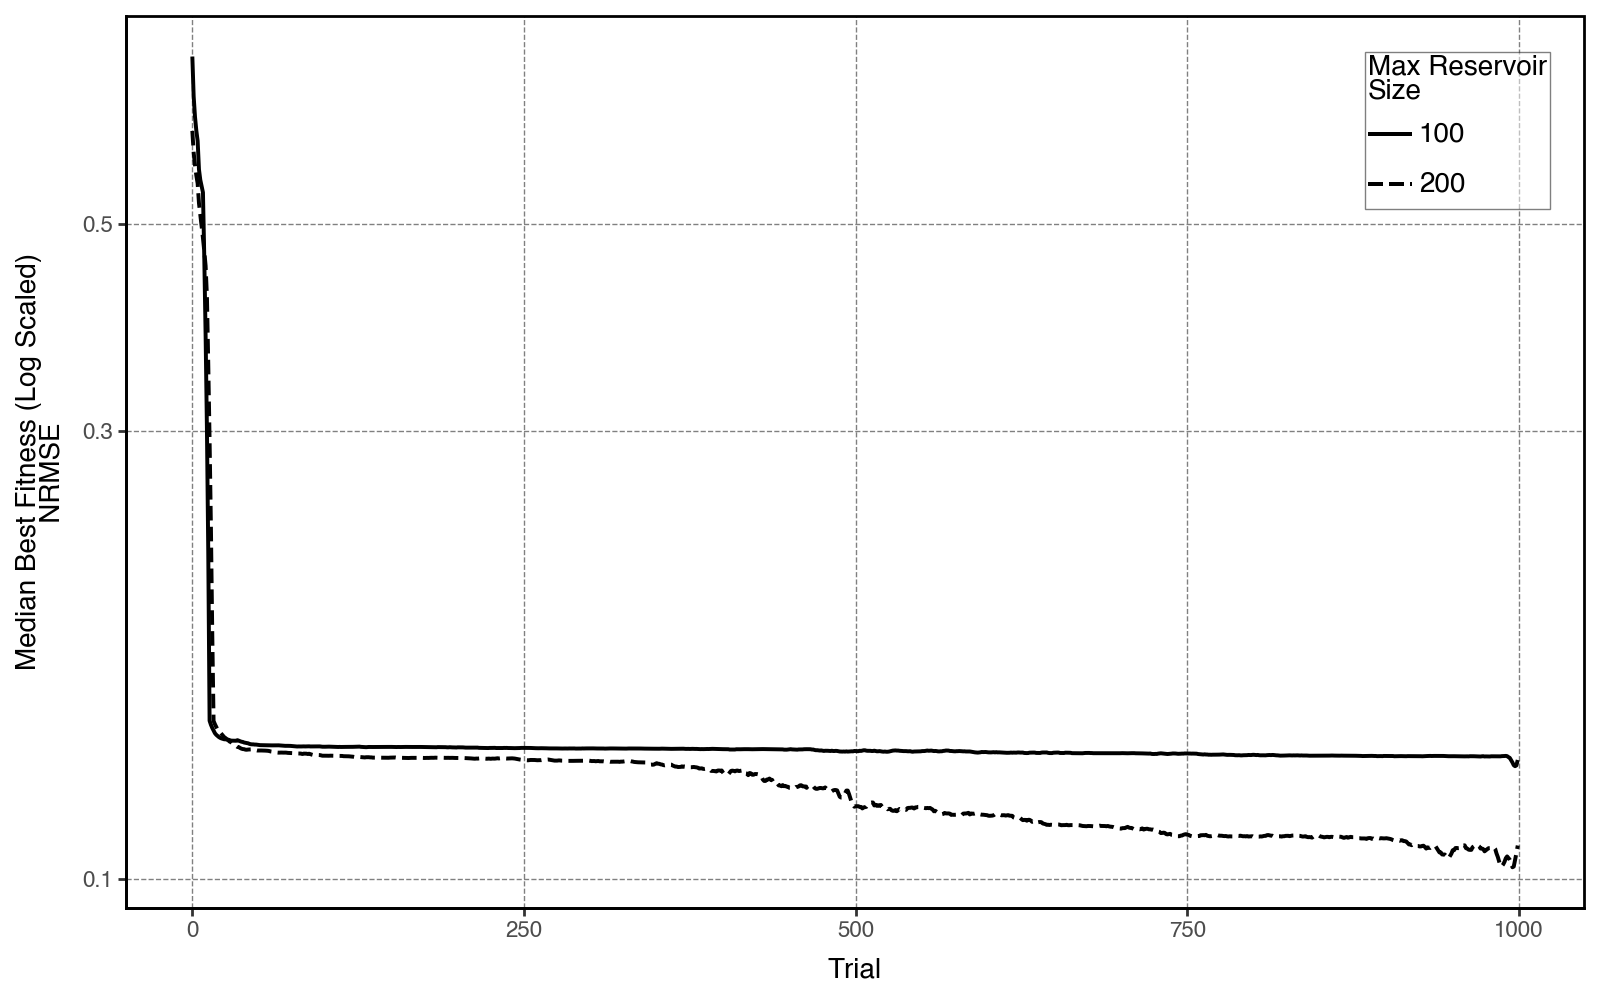

In [30]:
options.figure_size = (8, 5)

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    legend_position=(0.85, 0.96),  
    legend_justification=(0, 1)
)

palette = {"100": "black", "200": "black"}
linetype_mapping = {"100": "solid", "200": "dashed"}

summary_100 = compute_median_iqr(narma10_100_fitness, "100", "Max Reservoir\nSize")
summary_200 = compute_median_iqr(narma10_200_fitness, "200", "Max Reservoir\nSize")
summary_df = pd.concat([summary_100, summary_200])

window_size = 5 
summary_df["median_fitness_smooth"] = summary_df.groupby("Max Reservoir\nSize")["median_fitness"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df)
    + geom_line(aes(x="epoch", y="median_fitness_smooth", color="Max Reservoir\nSize", linetype="Max Reservoir\nSize"), size=0.8)
    + scale_color_manual(values=palette)
    + scale_linetype_manual(values=linetype_mapping)
    + scale_y_log10()
    + labs(
        x="Trial",
        y="Median Best Fitness (Log Scaled)\n                   NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narma10_fitness_median.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_fitness_iqr_smooth.pdf


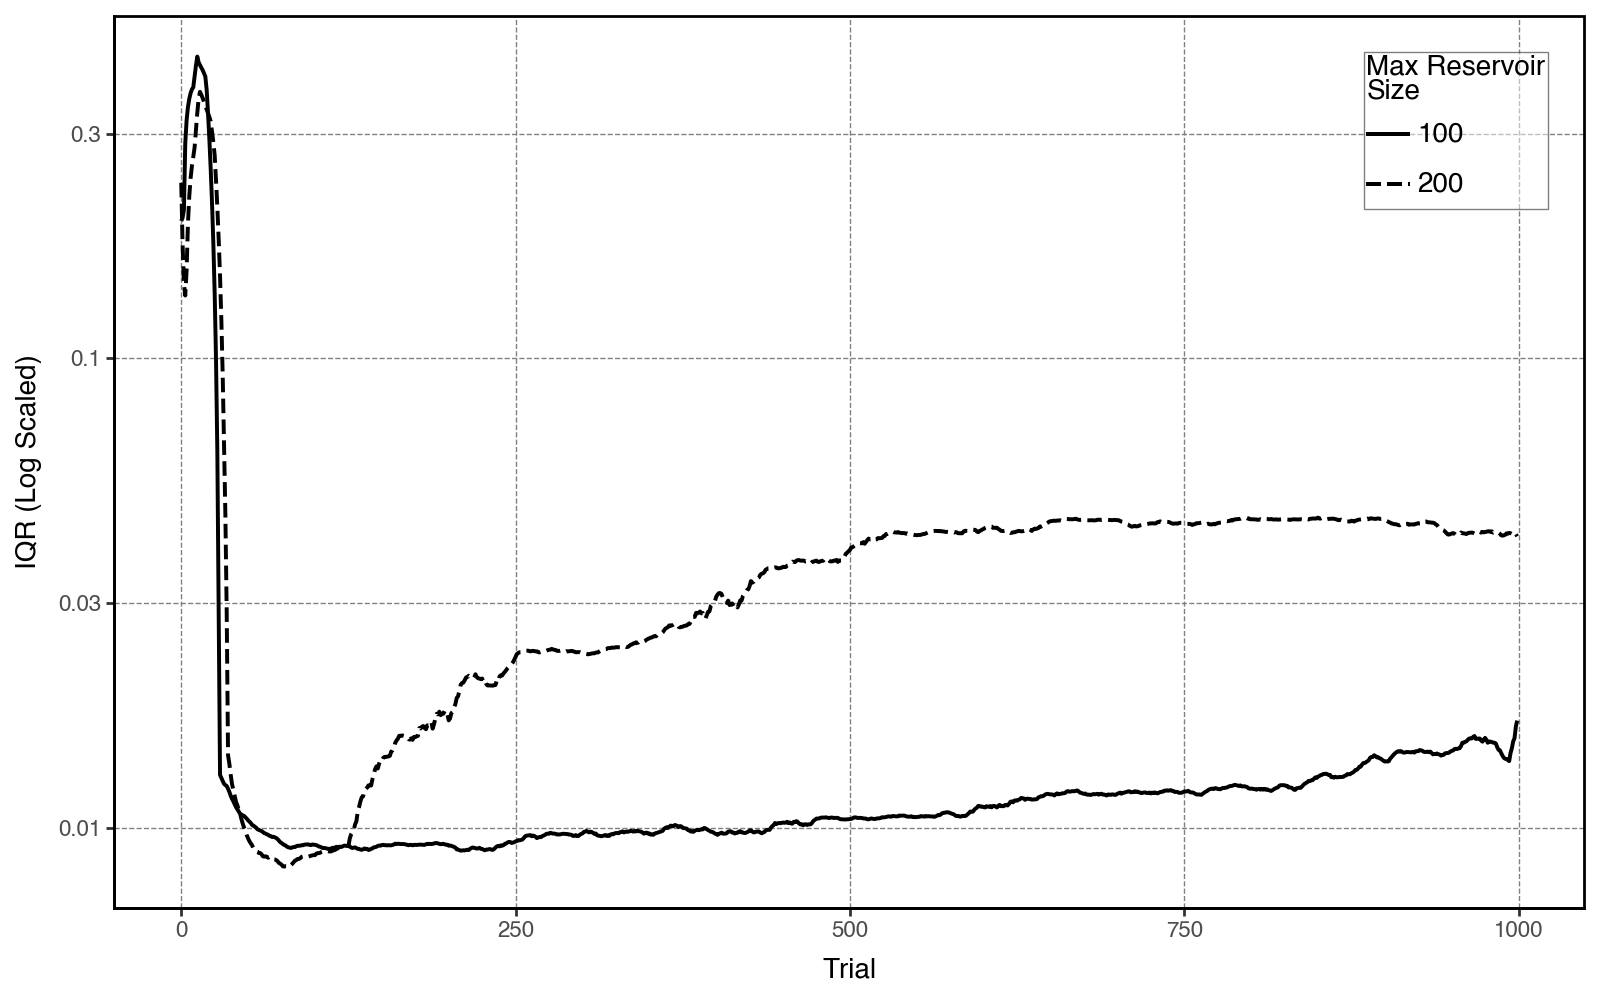

In [31]:

options.figure_size = (8, 5)

window_size = 10 
summary_df["IQR_width_smooth"] = summary_df.groupby("Max Reservoir\nSize")["IQR_width"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df, aes(x="epoch", y="IQR_width_smooth", color="Max Reservoir\nSize", linetype="Max Reservoir\nSize"))
    + geom_line(size=0.8)  
    + scale_color_manual(values=palette)
    + scale_linetype_manual(values=linetype_mapping)
    + scale_y_log10()
    + labs(
        x="Trial",
        y="IQR (Log Scaled)"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narma10_fitness_iqr_smooth.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narman_fitness_median.pdf


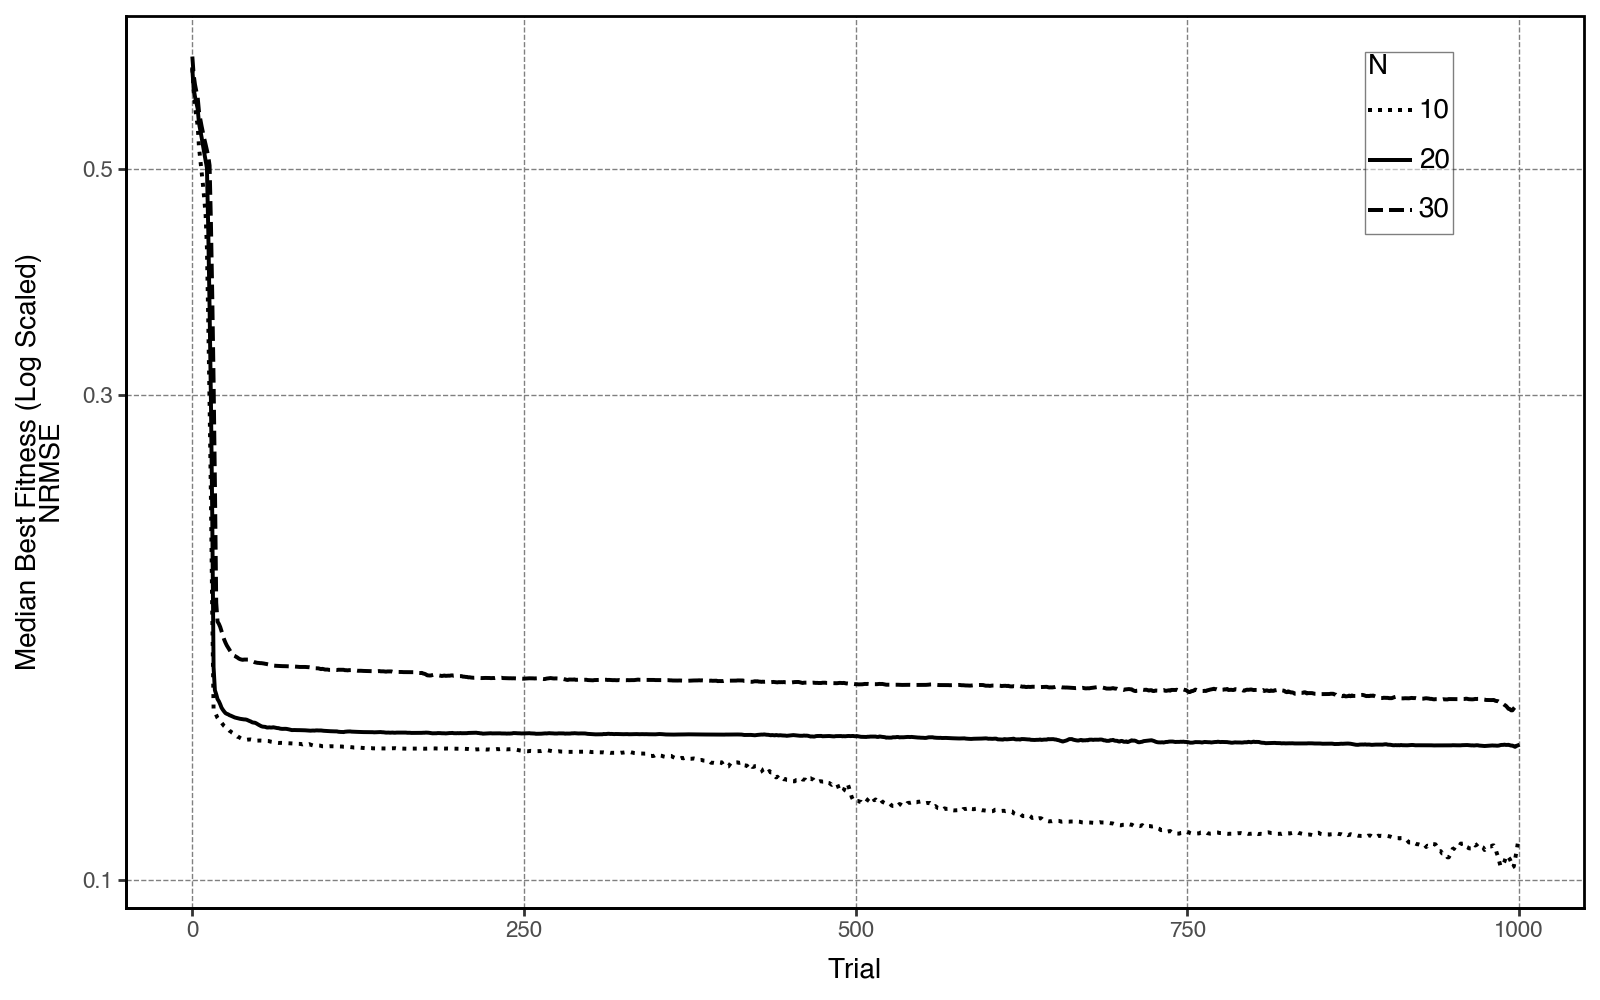

In [32]:
palette = {"10": "black", "20": "black", "30": "black"}
linetype_mapping = {"10": ":", "20": "-", "30": "--"}

summary_10 = compute_median_iqr(narma10_200_fitness, "10", "N")
summary_20 = compute_median_iqr(narma20_200_fitness, "20", "N")
summary_30 = compute_median_iqr(narma30_200_fitness, "30", "N")

summary_df = pd.concat([summary_10, summary_20, summary_30])

window_size = 5 
summary_df["median_fitness_smooth"] = summary_df.groupby("N")["median_fitness"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df)
    + geom_line(aes(x="epoch", y="median_fitness_smooth", color="N", linetype="N"), size=0.8)
    + scale_color_manual(values=palette)
    + scale_linetype_manual(values=linetype_mapping)
    + scale_y_log10()
    + labs(
        x="Trial",
        y="Median Best Fitness (Log Scaled)\n                   NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narman_fitness_median.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narman_fitness_iqr_smooth.pdf


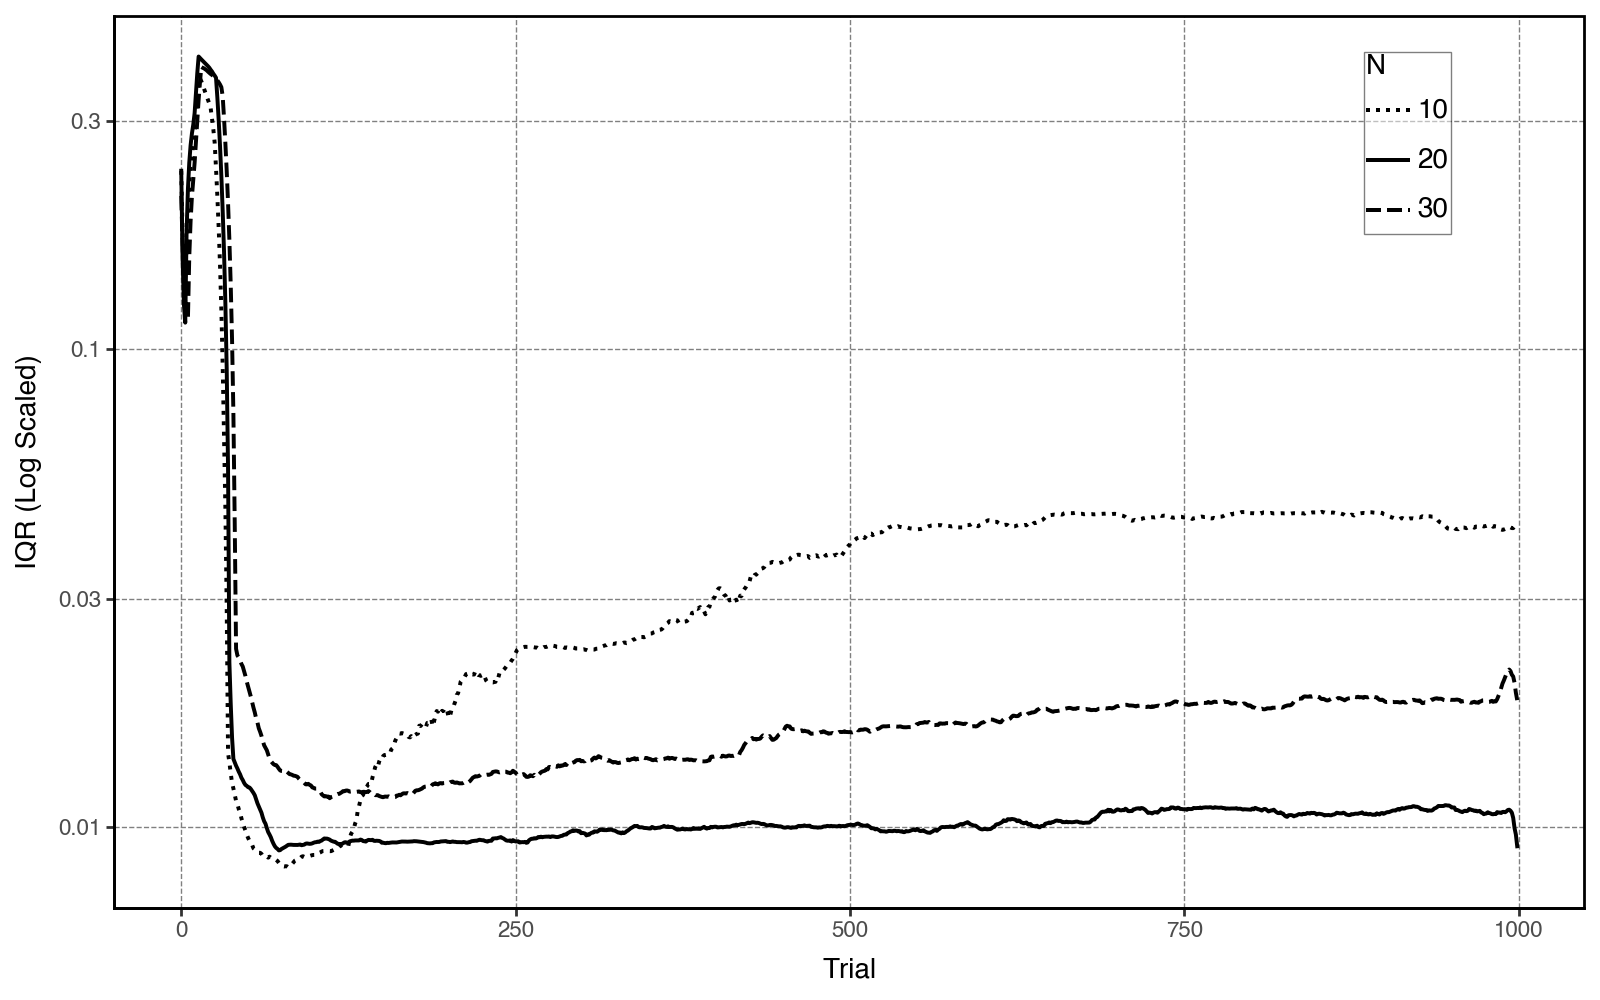

In [33]:

options.figure_size = (8, 5)

window_size = 10 
summary_df["IQR_width_smooth"] = summary_df.groupby("N")["IQR_width"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df, aes(x="epoch", y="IQR_width_smooth", color="N", linetype="N"))
    + geom_line(size=0.8)  
    + scale_color_manual(values=palette)
    + scale_linetype_manual(values=linetype_mapping)
    + scale_y_log10()
    + labs(
        x="Trial",
        y="IQR (Log Scaled)"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narman_fitness_iqr_smooth.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

In [164]:
narma10_100_980 = narma10_100_fitness[narma10_100_fitness["epoch"] == 980].copy()
narma10_200_980 = narma10_200_fitness[narma10_200_fitness["epoch"] == 980].copy()

narma10_100_980["Max Reservoir\nSize"] = "100"
narma10_200_980["Max Reservoir\nSize"] = "200"
narma10_100_980 = narma10_100_980[["run_id", "Max Reservoir\nSize", "best_fitness"]]
narma10_200_980 = narma10_200_980[["run_id", "Max Reservoir\nSize", "best_fitness"]]

merged_df = pd.concat([narma10_100_980, narma10_200_980], ignore_index=True)

merged_df["inverse_fitness"] = 1 - merged_df["best_fitness"]

def spectral_radius(adj_matrix):
    eigenvalues = np.linalg.eigvals(adj_matrix)  
    return max(abs(eigenvalues))

def get_structure_df(df, category, label):
    results = []
    
    for i in range(df.shape[0]):
        try:
            reservoir_encoded = df.loc[df['run_id'] == i, 'reservoir'].values[0]
            reservoir_decoded = jsonpickle.decode(reservoir_encoded)
            
            size = reservoir_decoded.size() 
            
            normalized_fitness = merged_df.loc[(merged_df["run_id"] == i) & (merged_df[category] == label), 'inverse_fitness'].values[0]
            
            graph_type = df.loc[df['run_id'] == i, 'graph_type'].values[0]
            
            results.append({
                "run_id": i, "size": size, "inverse_fitness": normalized_fitness, "SR": spectral_radius(reservoir_decoded.A),
                category: label, "Structure": ['Linear Strand', 'Loosely Stranded', 'Other'][graph_type-1]
            })
        
        except Exception as e:
            print(f"Error processing run_id {i} in dataset {label}: {e}")

    return pd.DataFrame(results)

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_100_num_nodes.pdf


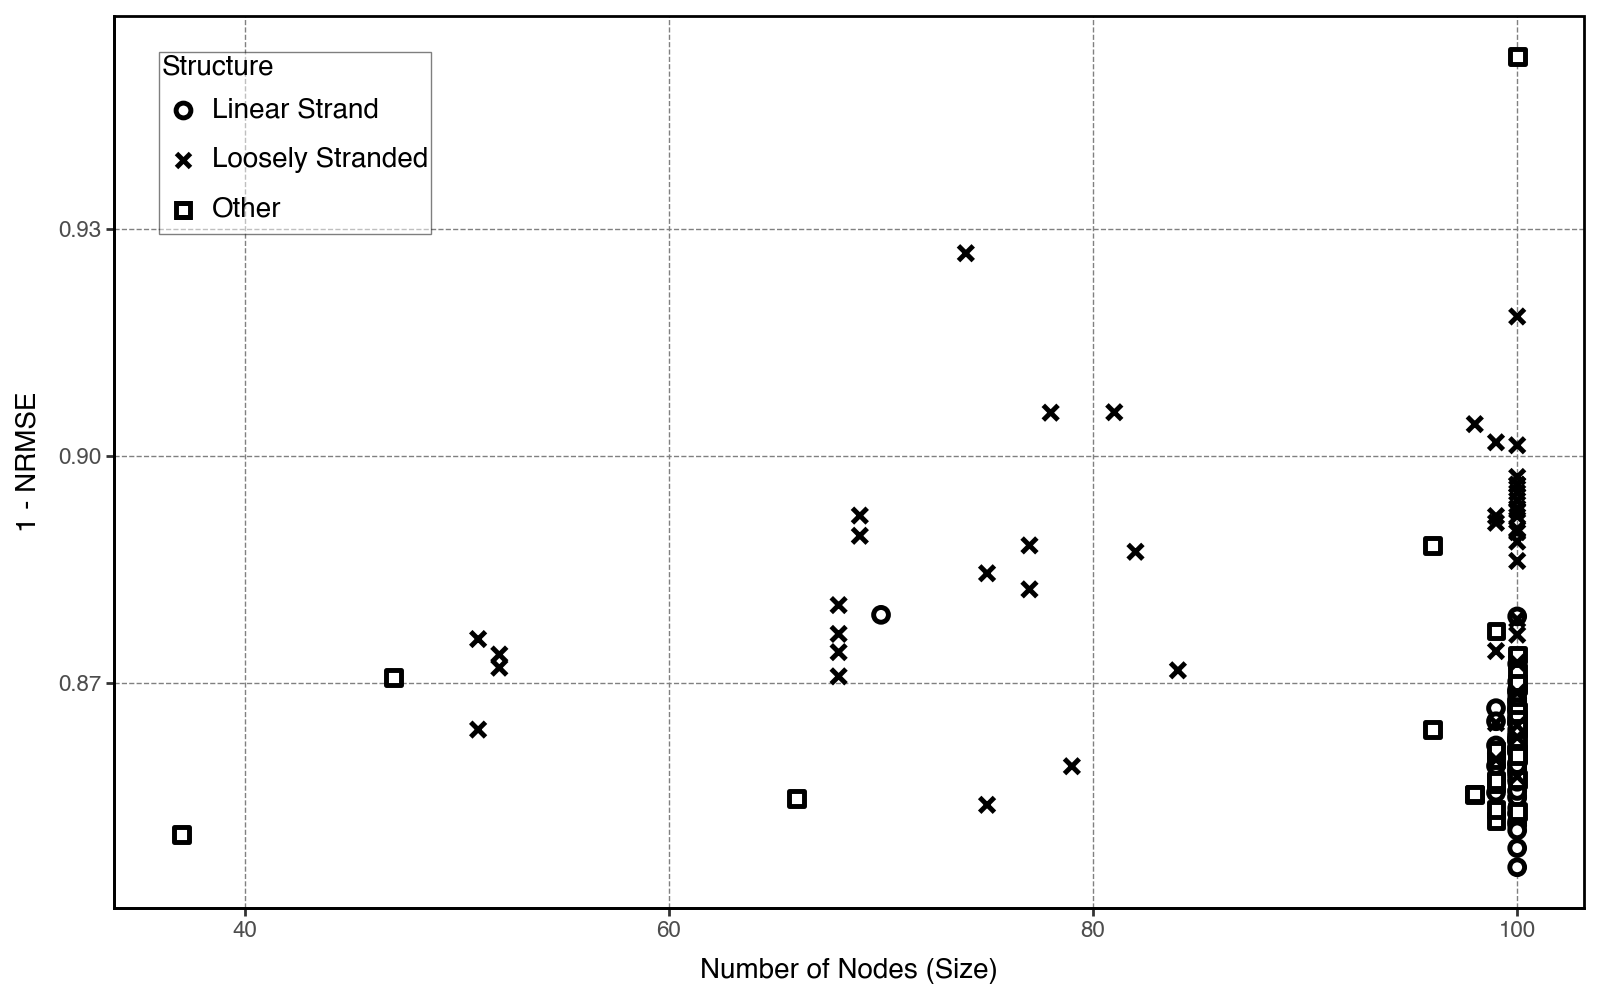

In [59]:
options.figure_size = (8, 5)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_100_models_manual_inspection.parquet"), "100")

shape_mapping = {
    "Linear Strand": "o",  
    "Loosely Stranded": "x",  
    "Other": "s"  
}

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    legend_position=(0.03, 0.96),  
    legend_justification=(0, 1)
)

g = (
    ggplot(scatter_df, aes(x="size", y="inverse_fitness", shape="Structure"))
    + geom_point(size=2, stroke=1, fill="white", color="black", alpha=1)  
    + scale_shape_manual(values=shape_mapping)  
    + labs(
        x="Number of Nodes (Size)",
        y="1 - NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narma10_100_num_nodes.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

Error processing run_id 49 in dataset 200: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_200_num_nodes.pdf


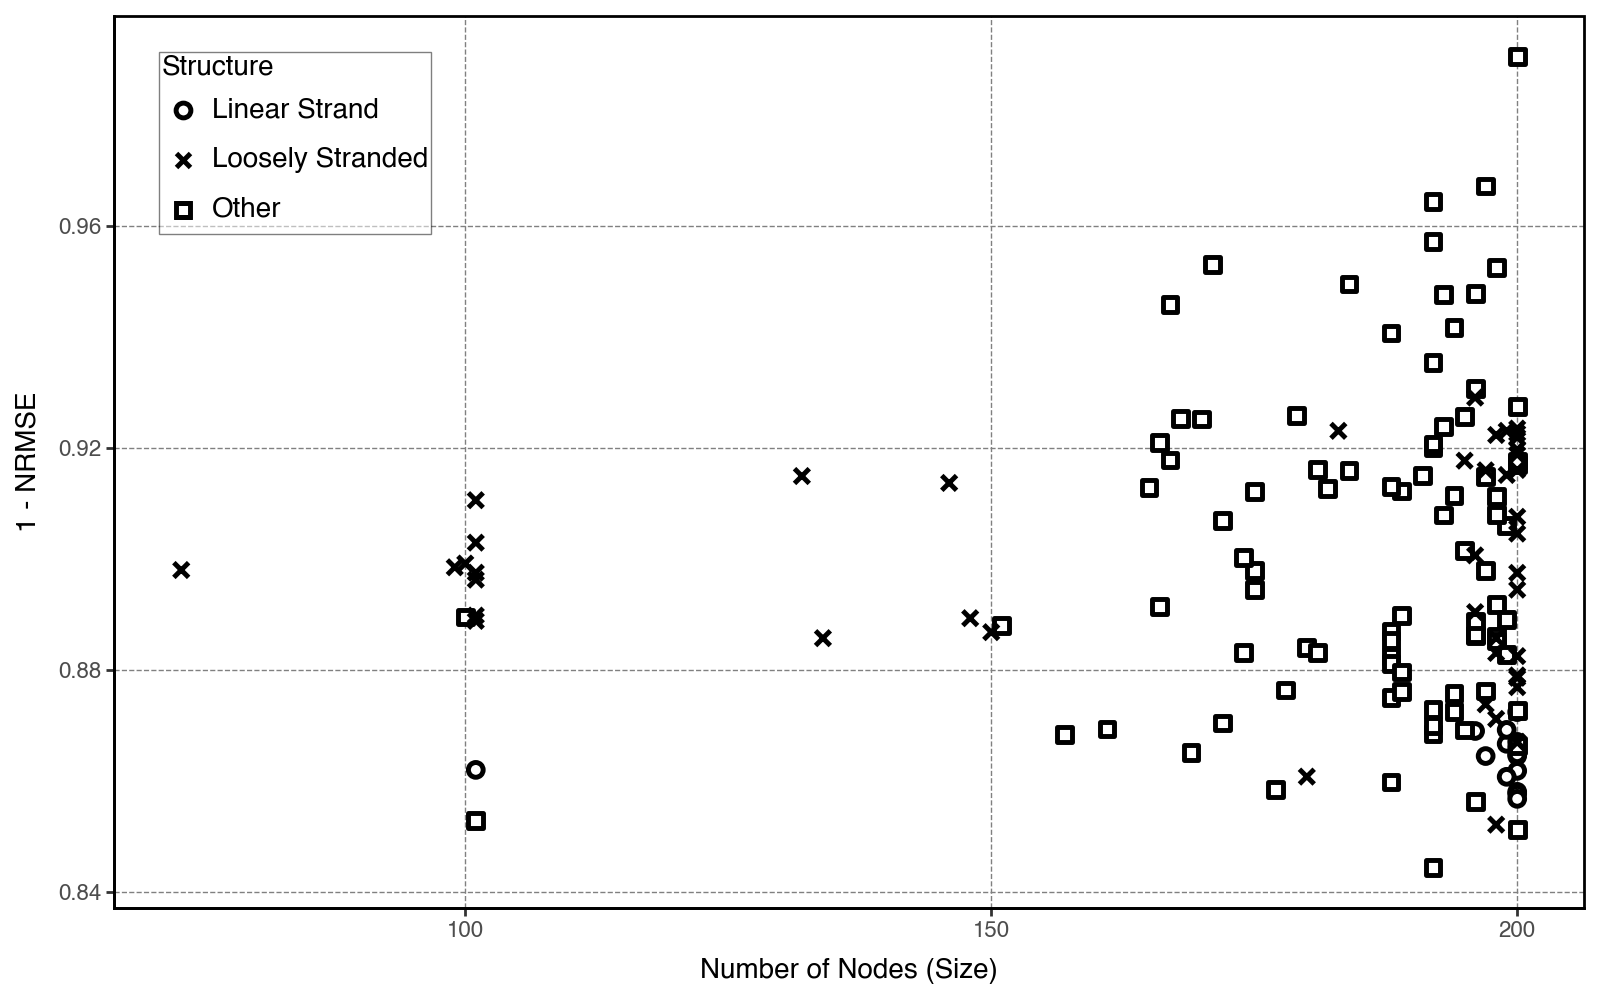

In [60]:
scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_200_models_manual_inspection.parquet"), "200")

g = (
    ggplot(scatter_df, aes(x="size", y="inverse_fitness", shape="Structure"))
    + geom_point(size=2, stroke=1, fill="white", color="black", alpha=1)  
    + scale_shape_manual(values=shape_mapping)  
    + labs(
        x="Number of Nodes (Size)",
        y="1 - NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/narma10_200_num_nodes.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_100_structure_counts.pdf


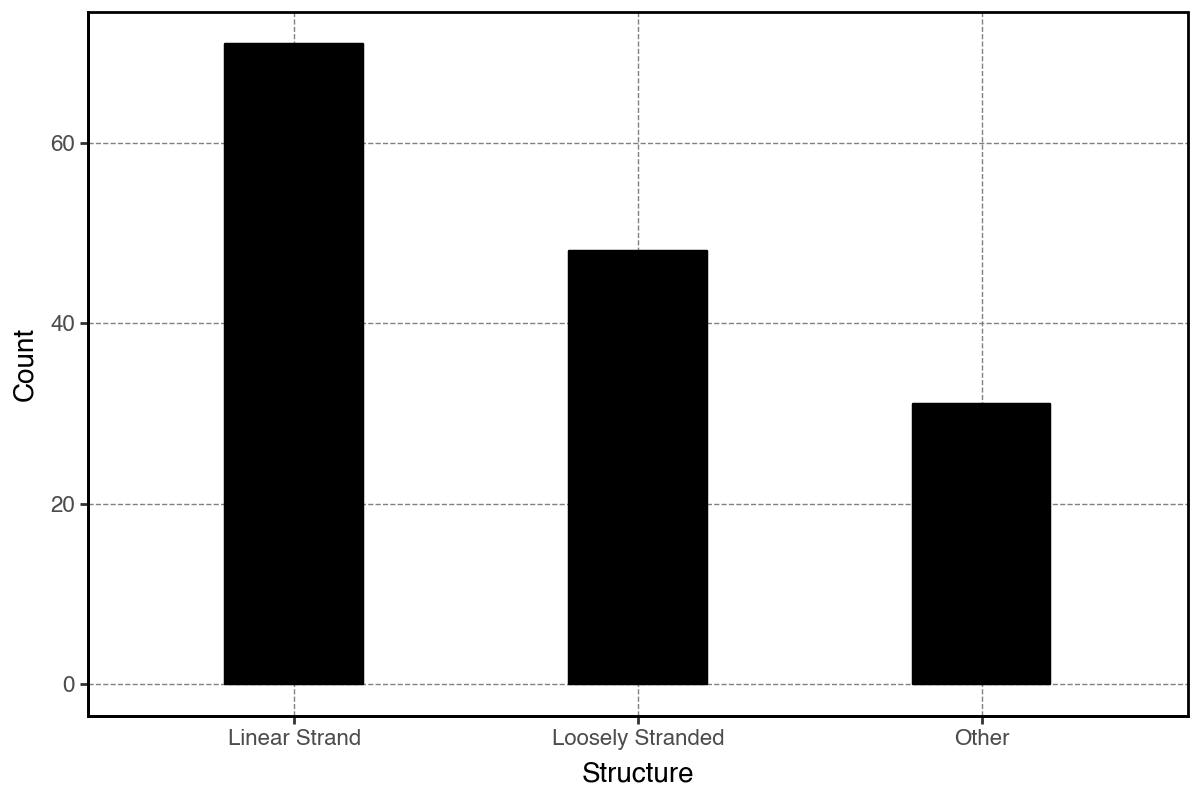

In [ ]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_100_models_manual_inspection.parquet"), "100")
structure_counts = scatter_df.groupby("Structure").size().reset_index(name="count")

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
)

g = (
    ggplot(structure_counts, aes(x="Structure", y="count"))
    + geom_bar(stat="identity", width=0.4, fill="black", color="black") 
    + labs(
        x="Structure",
        y="Count"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_100_structure_counts.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 49 in dataset 200: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_200_structure_counts.pdf


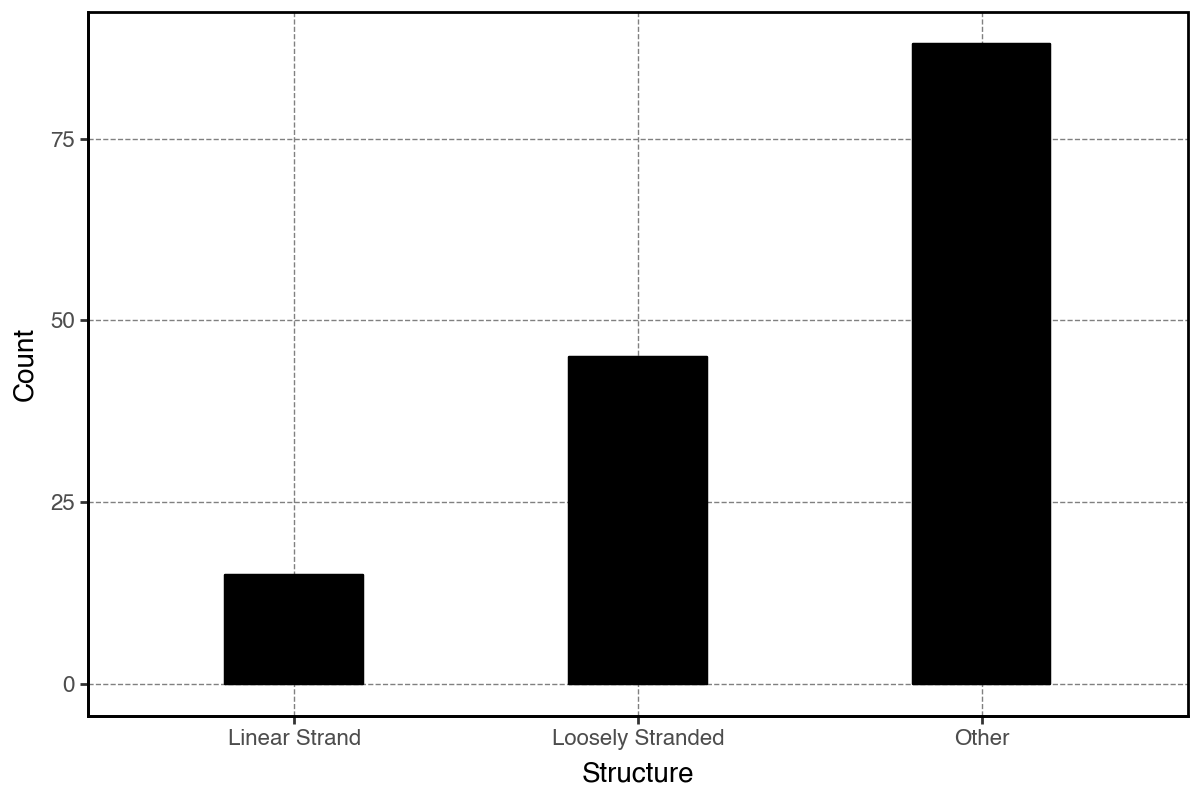

In [ ]:
scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_200_models_manual_inspection.parquet"), "200")
structure_counts = scatter_df.groupby("Structure").size().reset_index(name="count")

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
)

g = (
    ggplot(structure_counts, aes(x="Structure", y="count"))
    + geom_bar(stat="identity", width=0.4, fill="black", color="black") 
    + labs(
        x="Structure",
        y="Count"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_200_structure_counts.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_100_inverse_fitness_boxplot.pdf


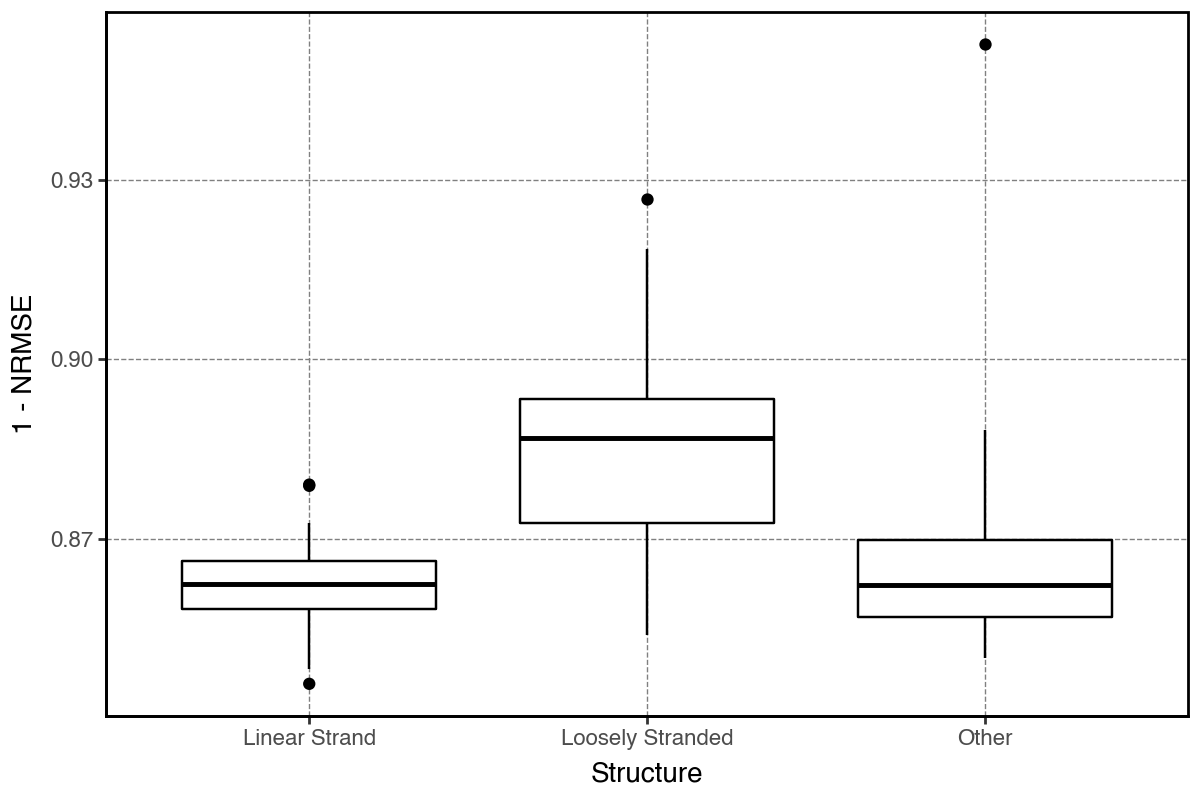

In [92]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_100_models_manual_inspection.parquet"), "Max Reservoir\nSize", "100")

g = (
    ggplot(scatter_df, aes(x="Structure", y="inverse_fitness"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_100_inverse_fitness_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 49 in dataset 200: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_200_inverse_fitness_boxplot.pdf


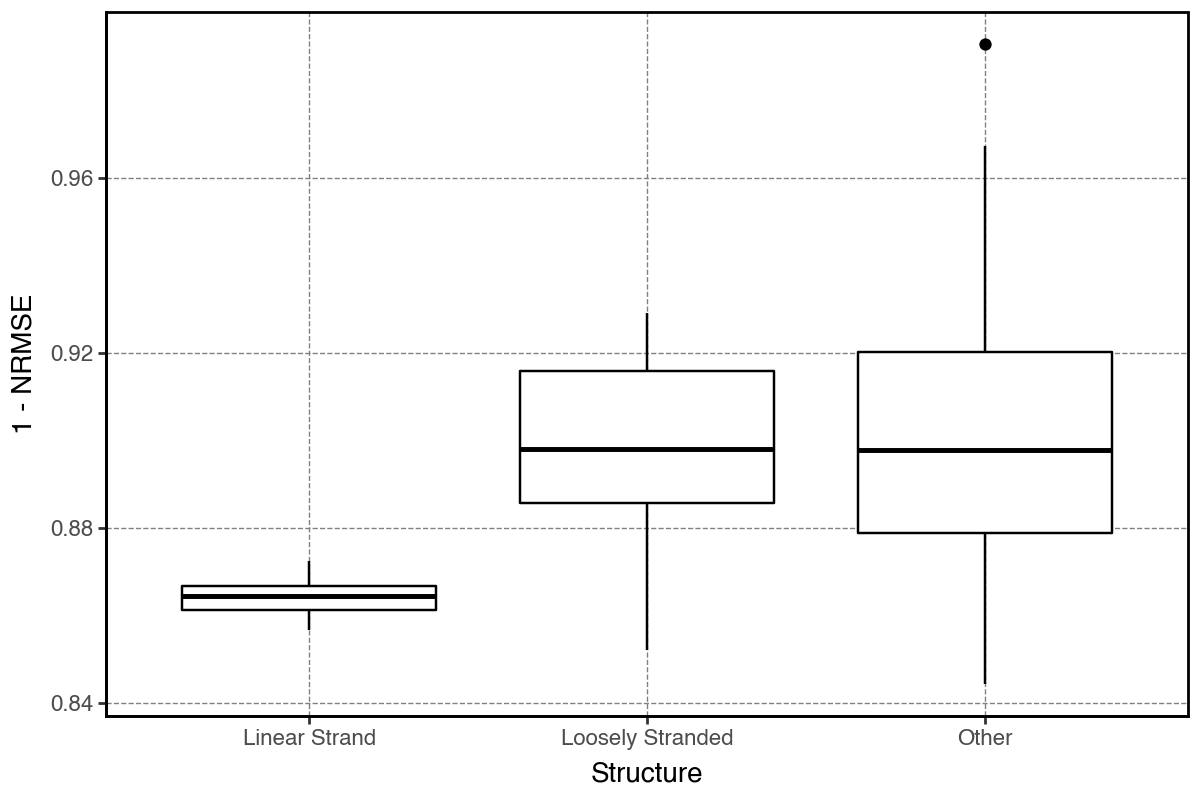

In [69]:
scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_200_models_manual_inspection.parquet"), "200")

g = (
    ggplot(scatter_df, aes(x="Structure", y="inverse_fitness"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_200_inverse_fitness_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_100_sr_boxplot.pdf


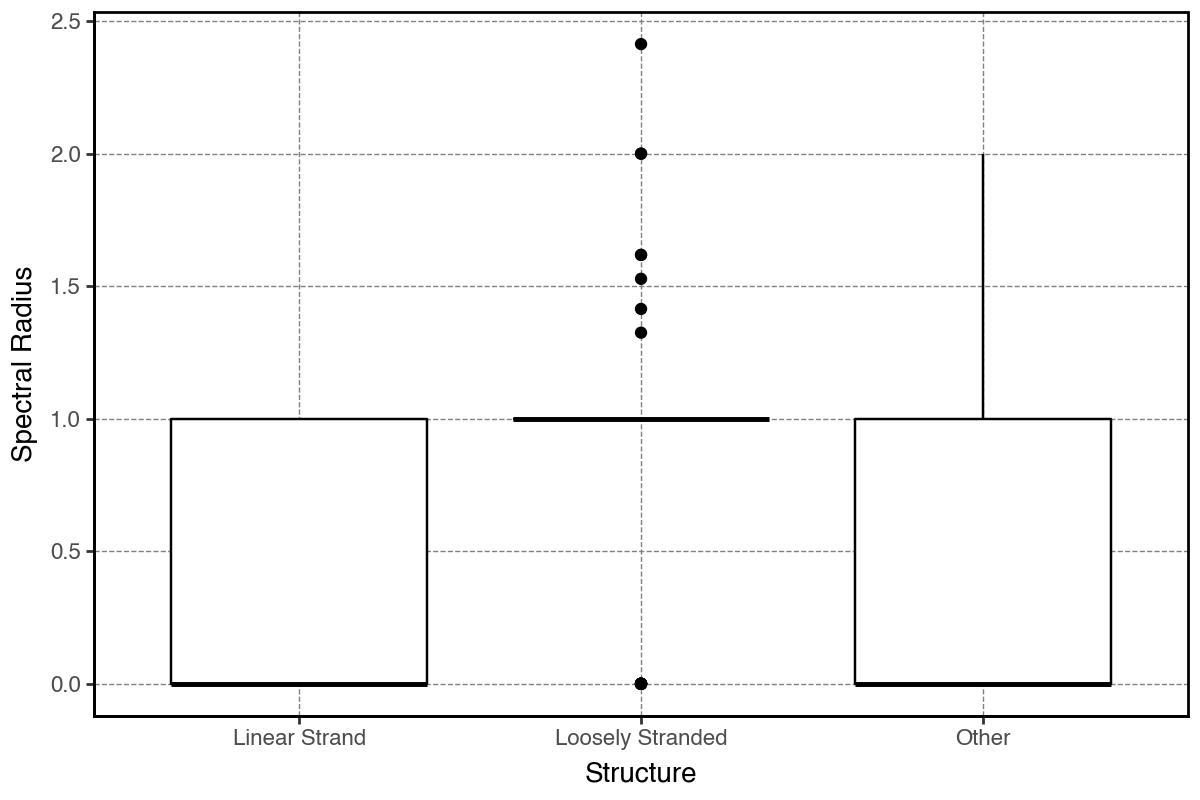

In [78]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_100_models_manual_inspection.parquet"), "100")

g = (
    ggplot(scatter_df, aes(x="Structure", y="SR"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="Spectral Radius"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_100_sr_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 49 in dataset 200: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_200_sr_boxplot.pdf


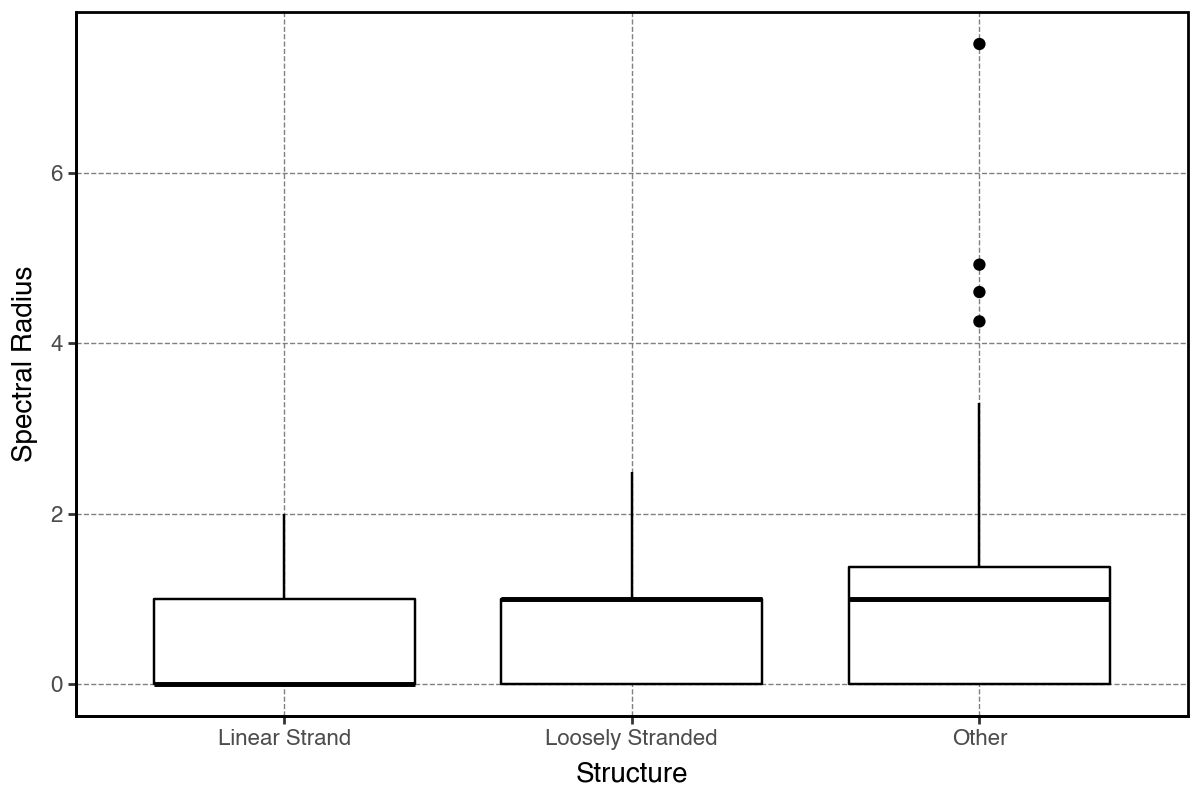

In [79]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma10_200_models_manual_inspection.parquet"), "200")

g = (
    ggplot(scatter_df, aes(x="Structure", y="SR"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="Spectral Radius"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_200_sr_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

In [94]:
narma10_200_980 = narma10_200_fitness[narma10_200_fitness["epoch"] == 980].copy()
narma20_200_980 = narma20_200_fitness[narma20_200_fitness["epoch"] == 980].copy()
narma30_200_980 = narma30_200_fitness[narma30_200_fitness["epoch"] == 980].copy()

narma10_200_980["order"] = "10"
narma20_200_980["order"] = "20"
narma30_200_980["order"] = "30"

narma10_200_980 = narma10_200_980[["run_id", "order", "best_fitness"]]
narma20_200_980 = narma20_200_980[["run_id", "order", "best_fitness"]]
narma30_200_980 = narma30_200_980[["run_id", "order", "best_fitness"]]

merged_df = pd.concat([narma10_200_980, narma20_200_980, narma30_200_980], ignore_index=True)

merged_df["inverse_fitness"] = 1 - merged_df["best_fitness"]

Error processing run_id 49 in dataset 10: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma20_200_structure_counts.pdf


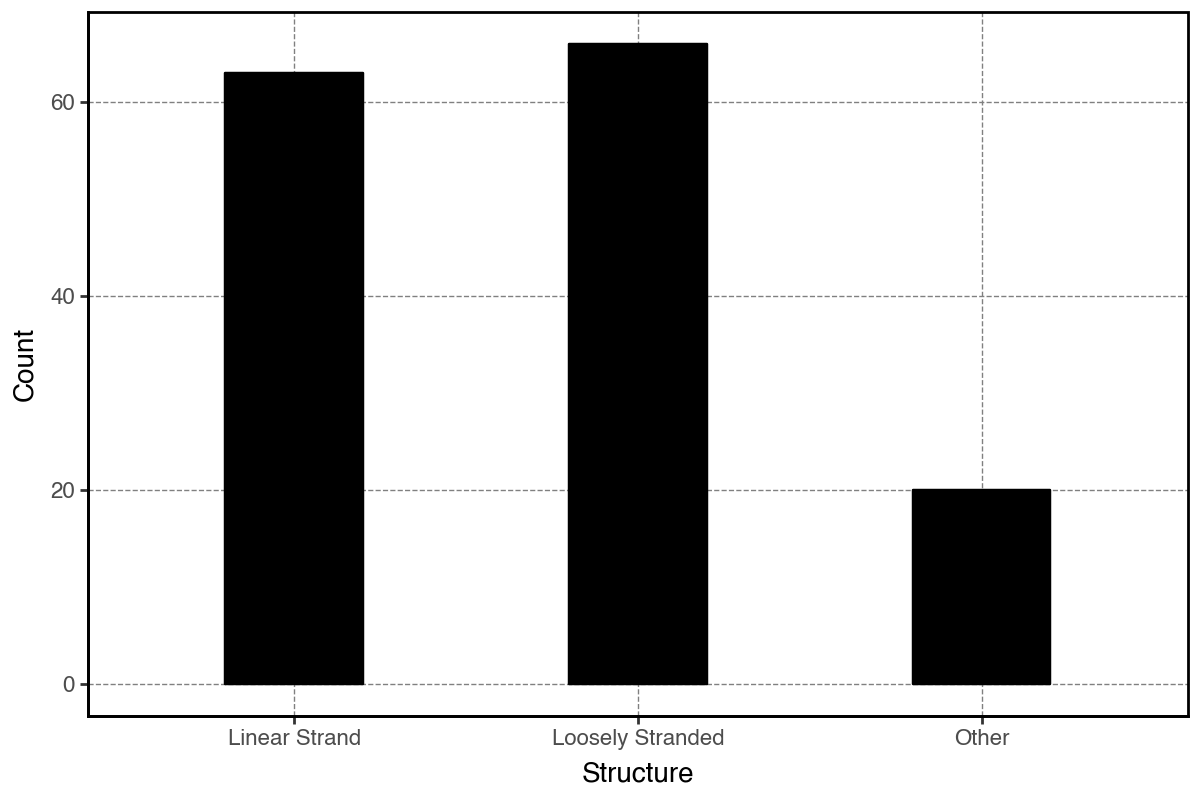

In [87]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma20_200_models_manual_inspection.parquet"), "order", "10")
structure_counts = scatter_df.groupby("Structure").size().reset_index(name="count")

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
)

g = (
    ggplot(structure_counts, aes(x="Structure", y="count"))
    + geom_bar(stat="identity", width=0.4, fill="black", color="black") 
    + labs(
        x="Structure",
        y="Count"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma20_200_structure_counts.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 38 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 42 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 49 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 65 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 79 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 92 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 107 in dataset 10: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 131 in dataset 10: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma30_200_structure_counts.pdf


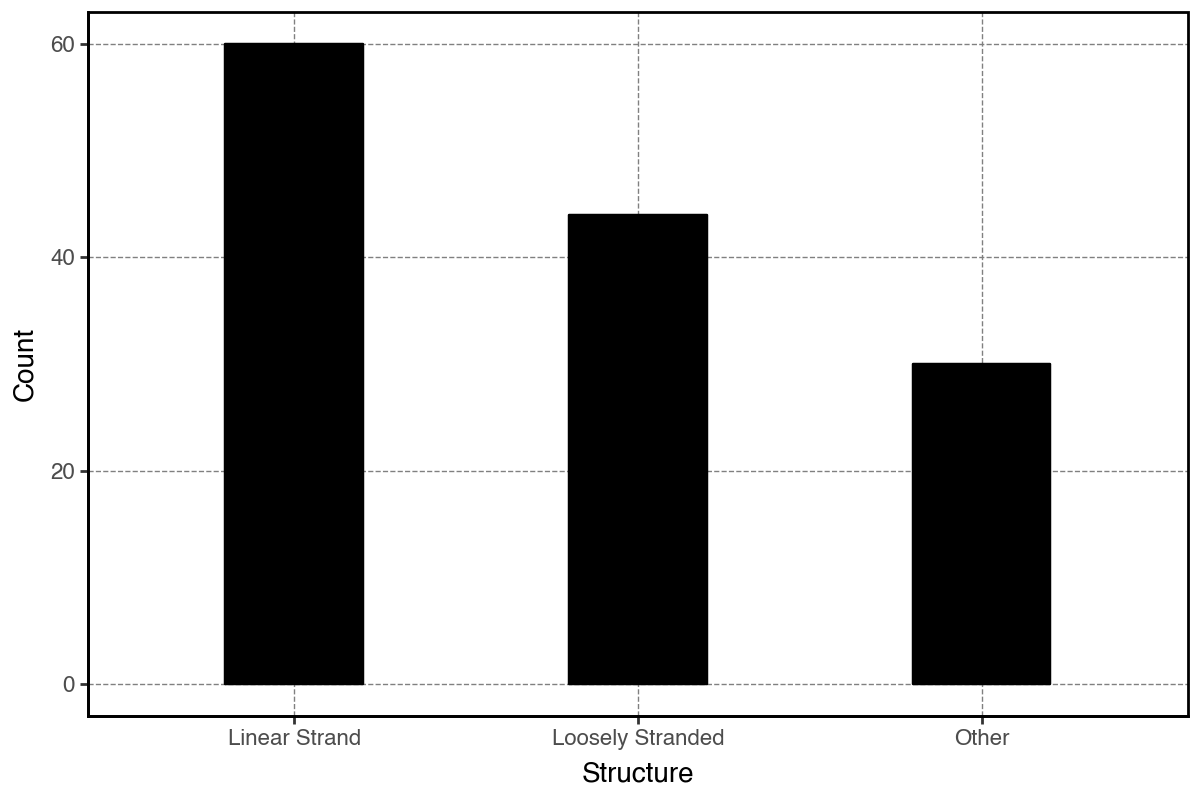

In [88]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma30_200_models_manual_inspection.parquet"), "order", "10")
structure_counts = scatter_df.groupby("Structure").size().reset_index(name="count")

g = (
    ggplot(structure_counts, aes(x="Structure", y="count"))
    + geom_bar(stat="identity", width=0.4, fill="black", color="black") 
    + labs(
        x="Structure",
        y="Count"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma30_200_structure_counts.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma20_200_inverse_fitness_boxplot.pdf


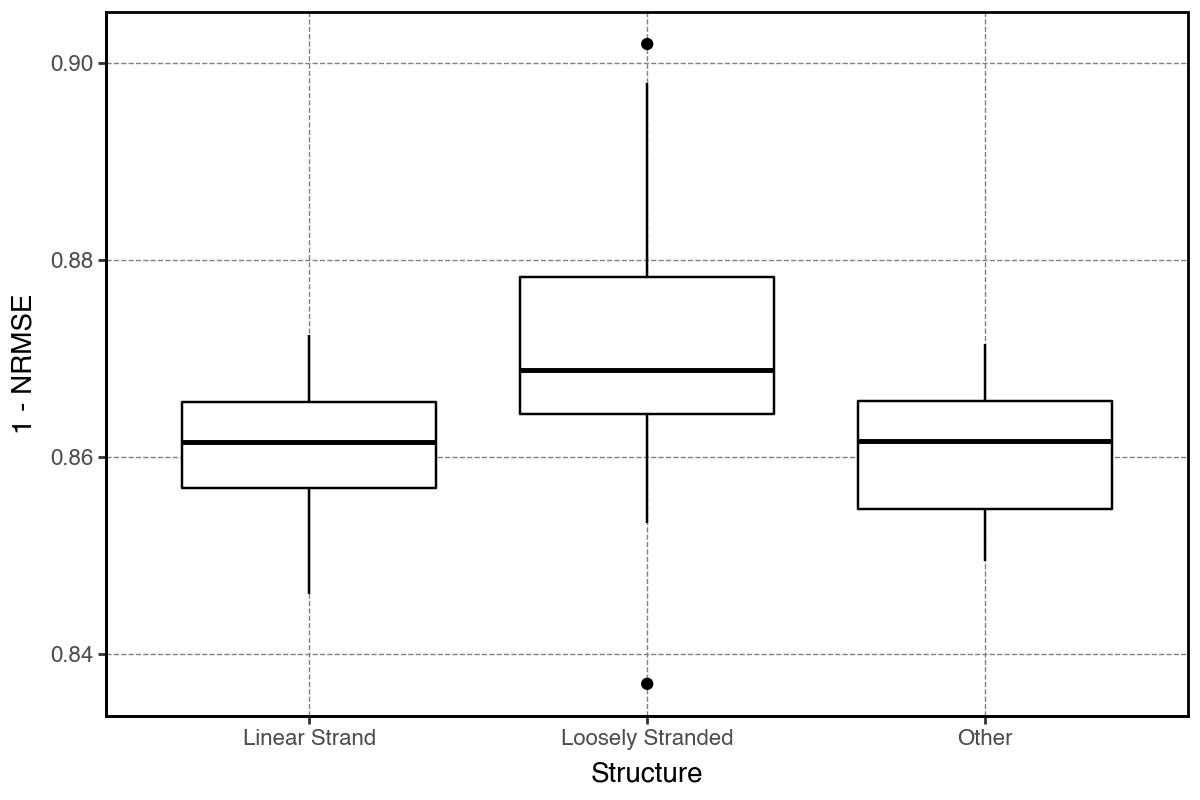

In [95]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma20_200_models_manual_inspection.parquet"), "order", "20")

g = (
    ggplot(scatter_df, aes(x="Structure", y="inverse_fitness"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma20_200_inverse_fitness_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 38 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 42 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 49 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 65 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 79 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 92 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 107 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 131 in dataset 30: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma30_200_inverse_fitness_boxplot.pdf


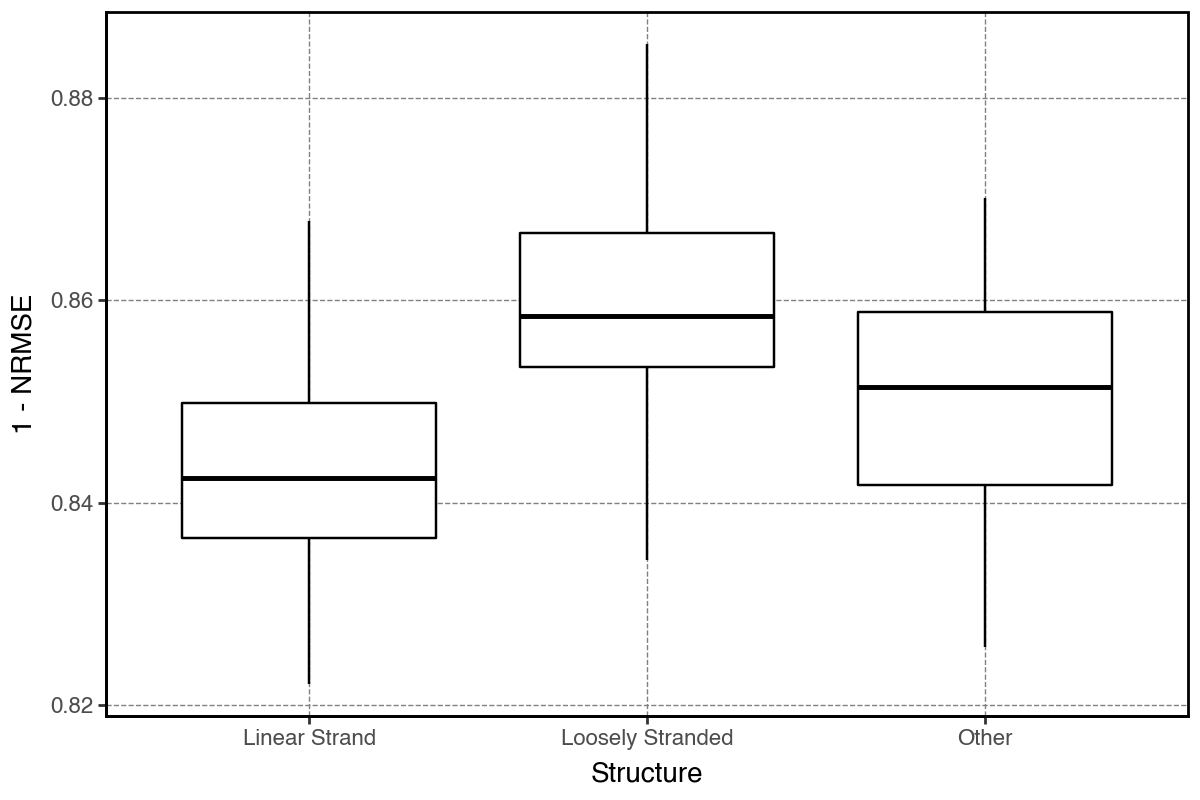

In [96]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma30_200_models_manual_inspection.parquet"), "order", "30")

g = (
    ggplot(scatter_df, aes(x="Structure", y="inverse_fitness"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma30_200_inverse_fitness_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma20_200_spectral_radius_boxplot.pdf


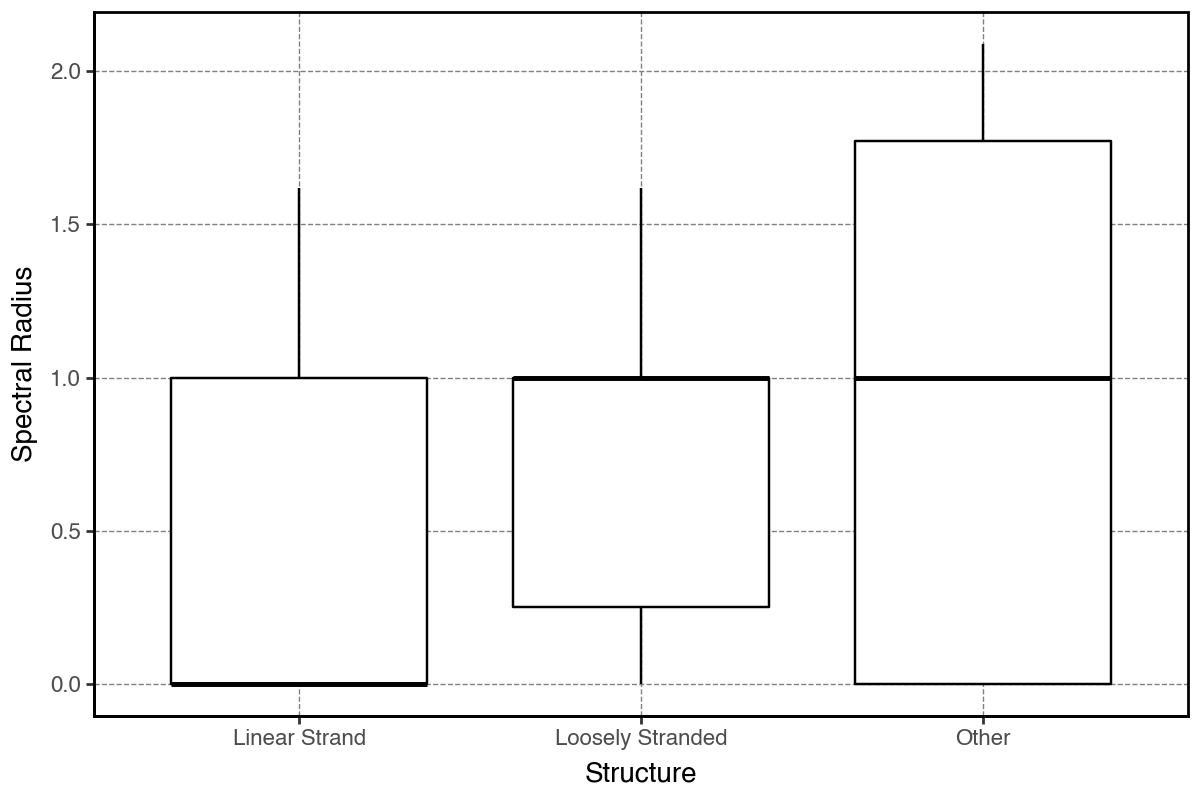

In [98]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma20_200_models_manual_inspection.parquet"), "order", "20")

g = (
    ggplot(scatter_df, aes(x="Structure", y="SR"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="Spectral Radius"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma20_200_spectral_radius_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

Error processing run_id 38 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 42 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 49 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 65 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 79 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 92 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 107 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 131 in dataset 30: index 0 is out of bounds for axis 0 with size 0


/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma30_200_spectral_radius_boxplot.pdf


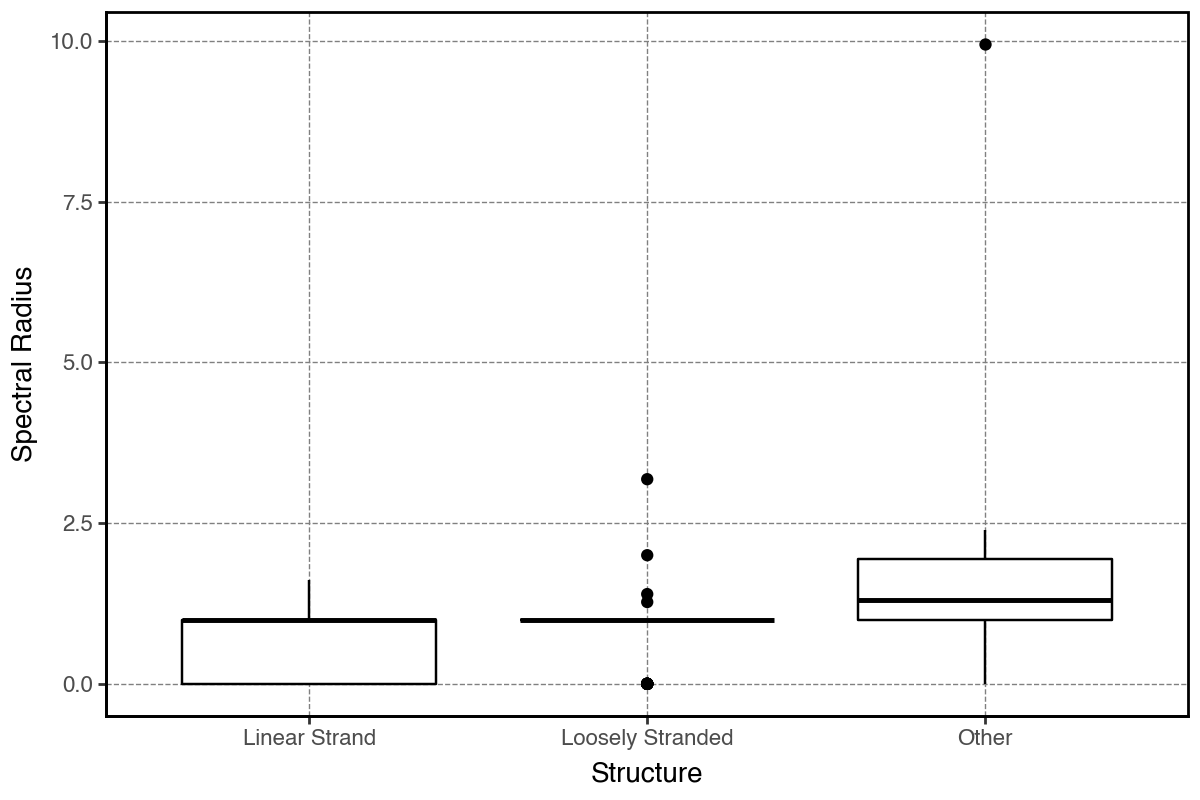

In [99]:
options.figure_size = (6, 4)

scatter_df = get_structure_df(pd.read_parquet("manual_inspection/narma30_200_models_manual_inspection.parquet"), "order", "30")

g = (
    ggplot(scatter_df, aes(x="Structure", y="SR"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(
        x="Structure",
        y="Spectral Radius"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma30_200_spectral_radius_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/santafe_fitness_median_iqr.pdf


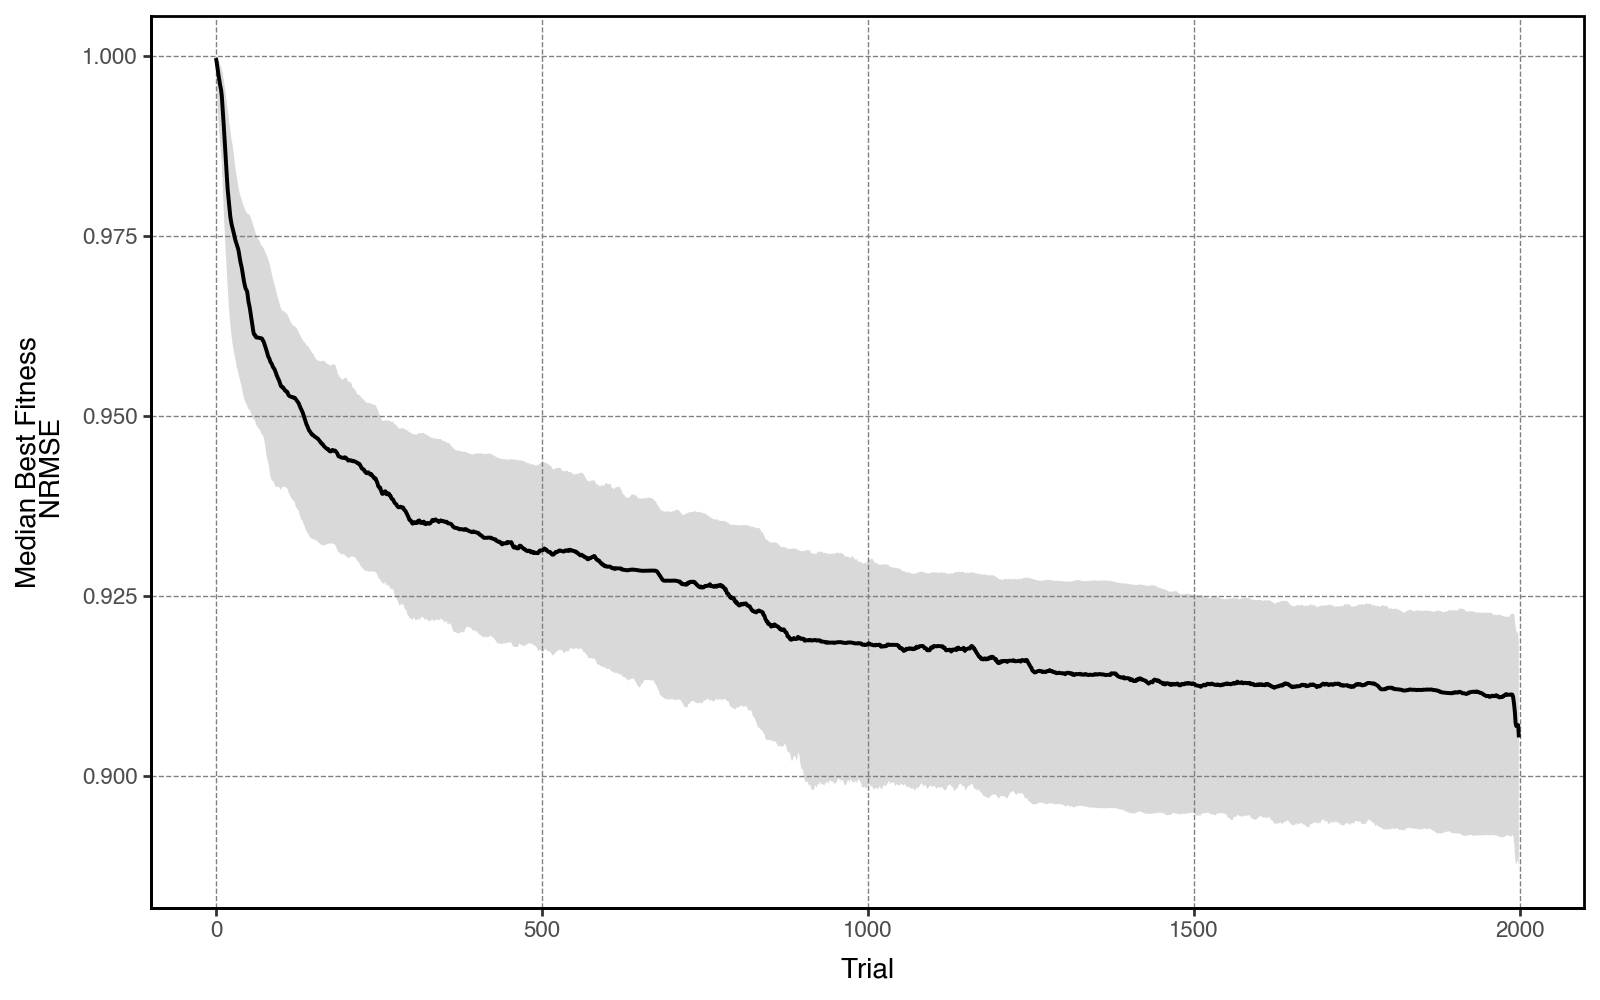

In [123]:
options.figure_size = (8, 5)

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),
    legend_position="none"
)

palette = {"200": "black"}
fill_palette = {"200": "gray"} 
linetype_mapping = {"200": "solid"}

summary_santafe = compute_median_iqr(santafe_200_fitness, "200", "Max Reservoir\nSize")
summary_df = summary_santafe

window_size = 10
summary_df["median_fitness_smooth"] = summary_df.groupby("Max Reservoir\nSize")["median_fitness"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q1_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q1"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q3_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q3"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df, aes(x="epoch"))
    + geom_ribbon(aes(ymin="q1_smooth", ymax="q3_smooth", fill="Max Reservoir\nSize"), alpha=0.3)  # Smoothed IQR Ribbon
    + geom_line(aes(y="median_fitness_smooth", color="Max Reservoir\nSize", linetype="Max Reservoir\nSize"), size=0.8)  # Smoothed Median Fitness
    + scale_color_manual(values=palette)  # Black lines
    + scale_fill_manual(values=fill_palette)  # Gray ribbon
    + scale_linetype_manual(values=linetype_mapping)
    + labs(
        x="Trial",
        y="Median Best Fitness\n         NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/santafe_fitness_median_iqr.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/io_fitness_median_iqr.pdf


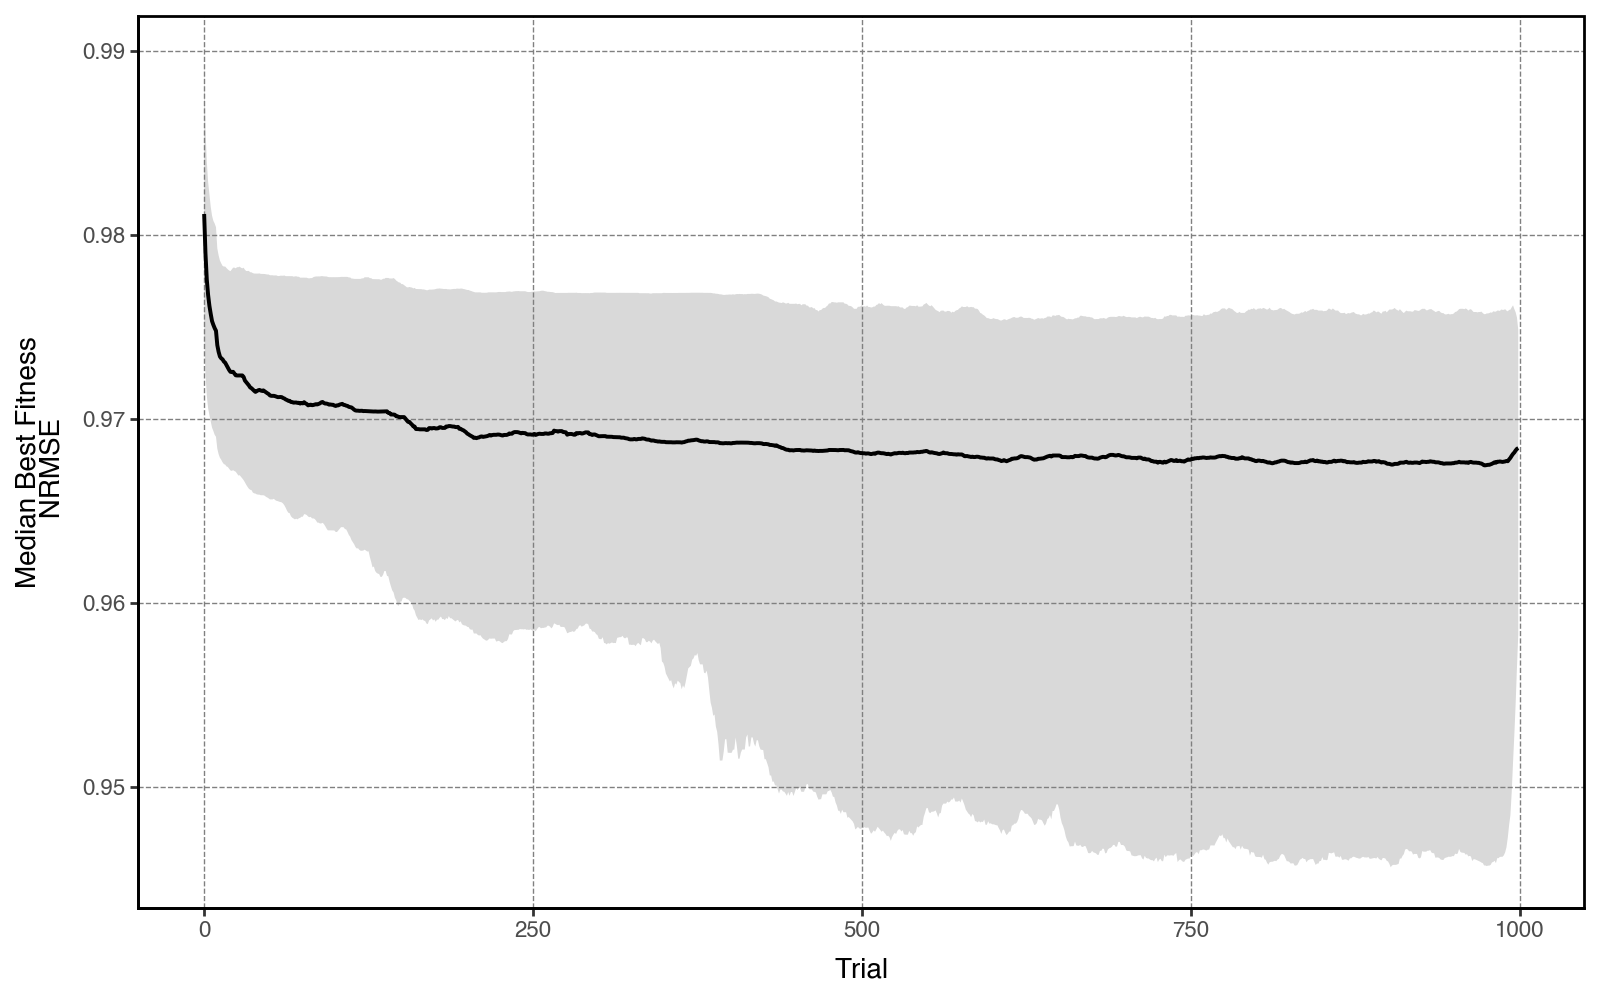

In [122]:
options.figure_size = (8, 5)

summary_io = compute_median_iqr(io_200_fitness, "200", "Max Reservoir\nSize")
summary_df = summary_io

window_size = 10
summary_df["median_fitness_smooth"] = summary_df.groupby("Max Reservoir\nSize")["median_fitness"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q1_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q1"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q3_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q3"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df, aes(x="epoch"))
    + geom_ribbon(aes(ymin="q1_smooth", ymax="q3_smooth", fill="Max Reservoir\nSize"), alpha=0.3)  # Smoothed IQR Ribbon
    + geom_line(aes(y="median_fitness_smooth", color="Max Reservoir\nSize", linetype="Max Reservoir\nSize"), size=0.8)  # Smoothed Median Fitness
    + scale_color_manual(values=palette)  # Black lines
    + scale_fill_manual(values=fill_palette)  # Gray ribbon
    + scale_linetype_manual(values=linetype_mapping)
    + labs(
        x="Trial",
        y="Median Best Fitness\n         NRMSE"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/io_fitness_median_iqr.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/combined_fitness_median_iqr.pdf


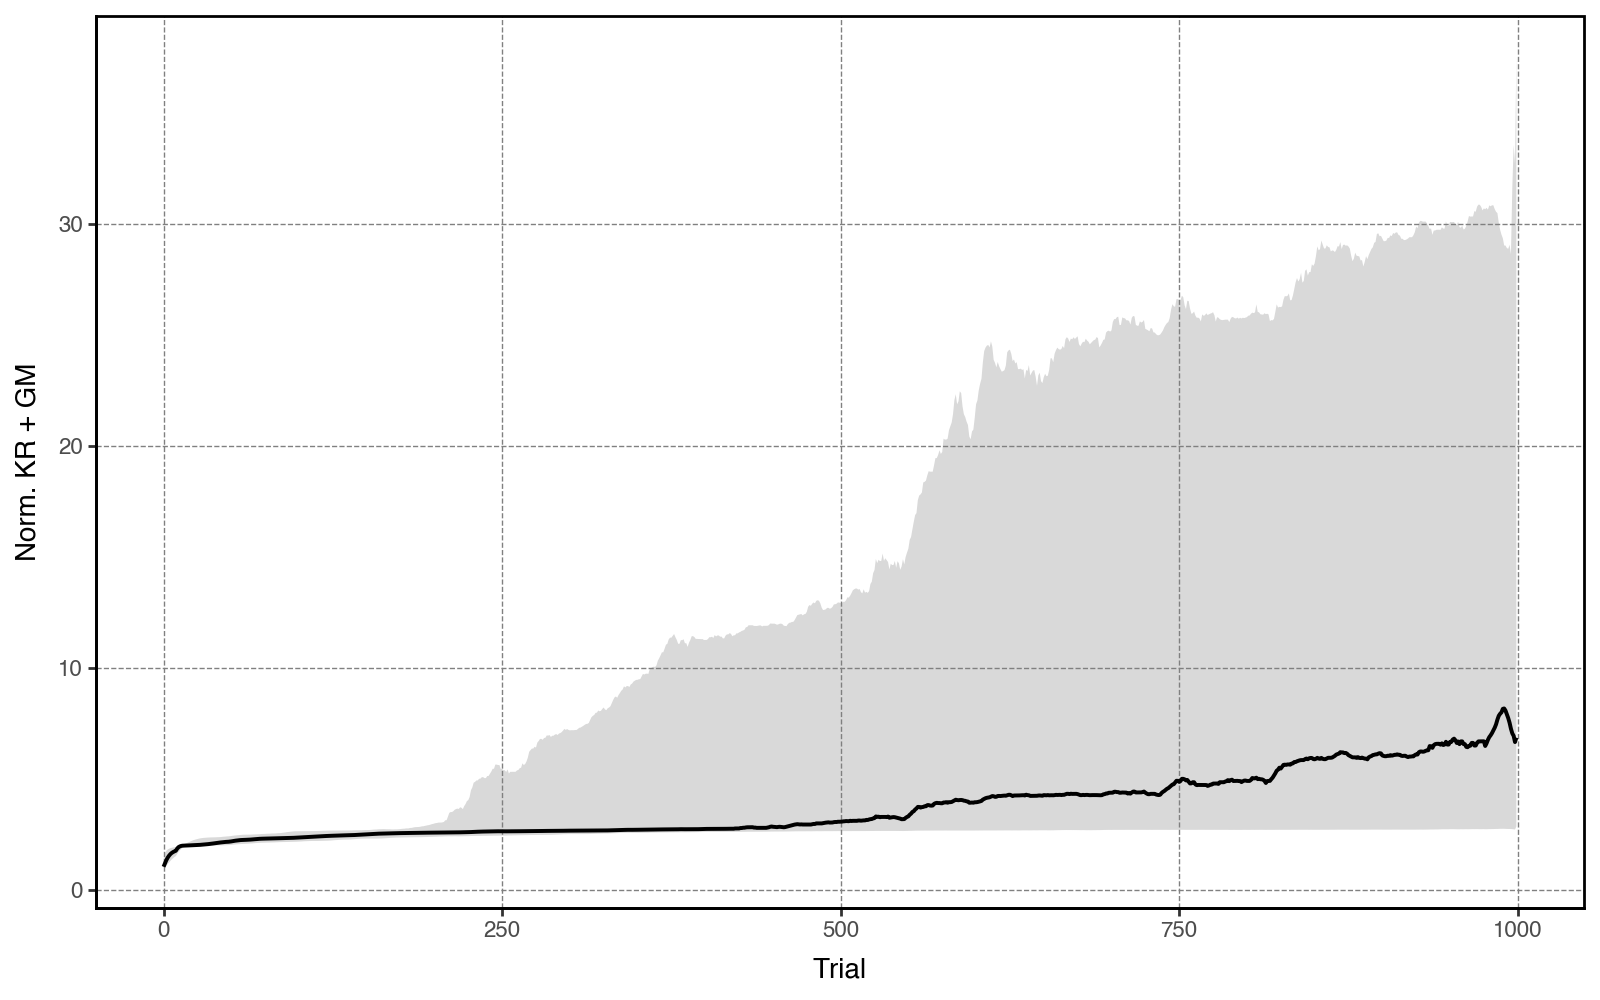

In [121]:
options.figure_size = (8, 5)

summary_combined = compute_median_iqr(combined_200_fitness, "200", "Max Reservoir\nSize")
summary_df = summary_combined

window_size = 10
summary_df["median_fitness_smooth"] = summary_df.groupby("Max Reservoir\nSize")["median_fitness"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q1_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q1"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())
summary_df["q3_smooth"] = summary_df.groupby("Max Reservoir\nSize")["q3"].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

g = (
    ggplot(summary_df, aes(x="epoch"))
    + geom_ribbon(aes(ymin="q1_smooth", ymax="q3_smooth", fill="Max Reservoir\nSize"), alpha=0.3)  # Smoothed IQR Ribbon
    + geom_line(aes(y="median_fitness_smooth", color="Max Reservoir\nSize", linetype="Max Reservoir\nSize"), size=0.8)  # Smoothed Median Fitness
    + scale_color_manual(values=palette)  # Black lines
    + scale_fill_manual(values=fill_palette)  # Gray ribbon
    + scale_linetype_manual(values=linetype_mapping)
    + labs(
        x="Trial",
        y="Norm. KR + GM"
    )
    + theme_classic()  
    + custom_theme
)

g.save("results/combined_fitness_median_iqr.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

 51%|█████     | 76/149 [00:00<00:00, 144.48it/s]

Error processing run_id 49 in dataset 200: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 149/149 [00:01<00:00, 141.38it/s]
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_degree_density.pdf


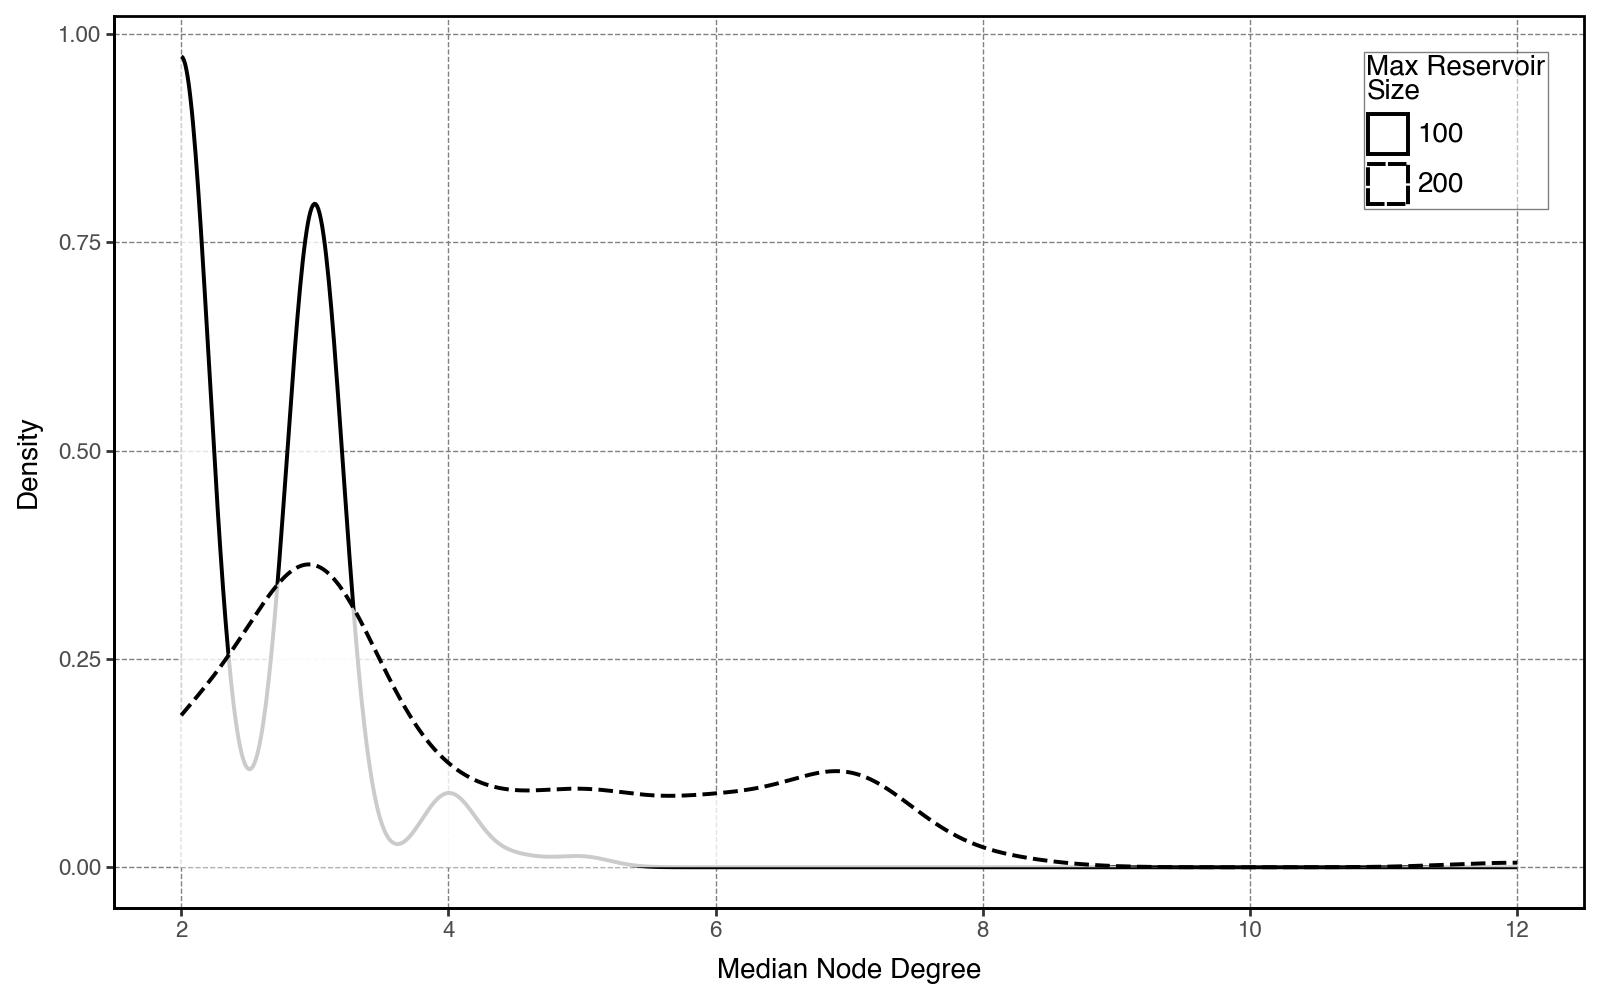

In [131]:
options.figure_size = (8, 5)

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    legend_position=(0.85, 0.96),  
    legend_justification=(0, 1)
)

def compute_average_node_degree(reservoir_decoded):
    adj_matrix = reservoir_decoded.A  # Adjacency matrix from the reservoir
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)  # Convert to a graph
    degrees = np.array([deg for _, deg in G.degree()])
    return np.median(degrees)

datasets = [
    (narma10_100_models, "100"),
    (narma10_200_models, "200")
]

results = []

for df, label in datasets:
    for i in tqdm(range(df.shape[0])): 
        try:
            reservoir_encoded = df.loc[df['run_id'] == i, 'reservoir'].values[0]
            reservoir_decoded = jsonpickle.decode(reservoir_encoded)
            
            avg_degree = compute_average_node_degree(reservoir_decoded)
            
            results.append({"run_id": i, "Max Reservoir\nSize": label, "avg_degree": avg_degree})
            
        except Exception as e:
            print(f"Error processing run_id {i} in dataset {label}: {e}")

deg_df = pd.DataFrame(results)

linetype_mapping = {"100": "solid", "200": "dashed"}

g = (
    ggplot(deg_df, aes(x='avg_degree', linetype='Max Reservoir\nSize'))  # Differentiate by linetype
    + geom_density(fill="white", color="black", alpha=0.8, size=0.8)  # White fill, black outline
    + scale_linetype_manual(values=linetype_mapping)  # Different line patterns
    + scale_x_continuous(breaks=np.linspace(2, 16, num=8))  # Adjust x-axis breaks
    + labs(
        x="Median Node Degree",
        y="Density"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_degree_density.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

 55%|█████▌    | 82/149 [00:00<00:00, 153.32it/s]

Error processing run_id 49 in dataset 10: index 0 is out of bounds for axis 0 with size 0


 50%|█████     | 71/142 [00:00<00:00, 176.70it/s]

Error processing run_id 38 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 42 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 49 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 65 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 79 in dataset 30: index 0 is out of bounds for axis 0 with size 0


 89%|████████▊ | 126/142 [00:00<00:00, 172.47it/s]

Error processing run_id 92 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 107 in dataset 30: index 0 is out of bounds for axis 0 with size 0
Error processing run_id 131 in dataset 30: index 0 is out of bounds for axis 0 with size 0


100%|██████████| 142/142 [00:00<00:00, 171.85it/s]
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narman_state_distribution.pdf


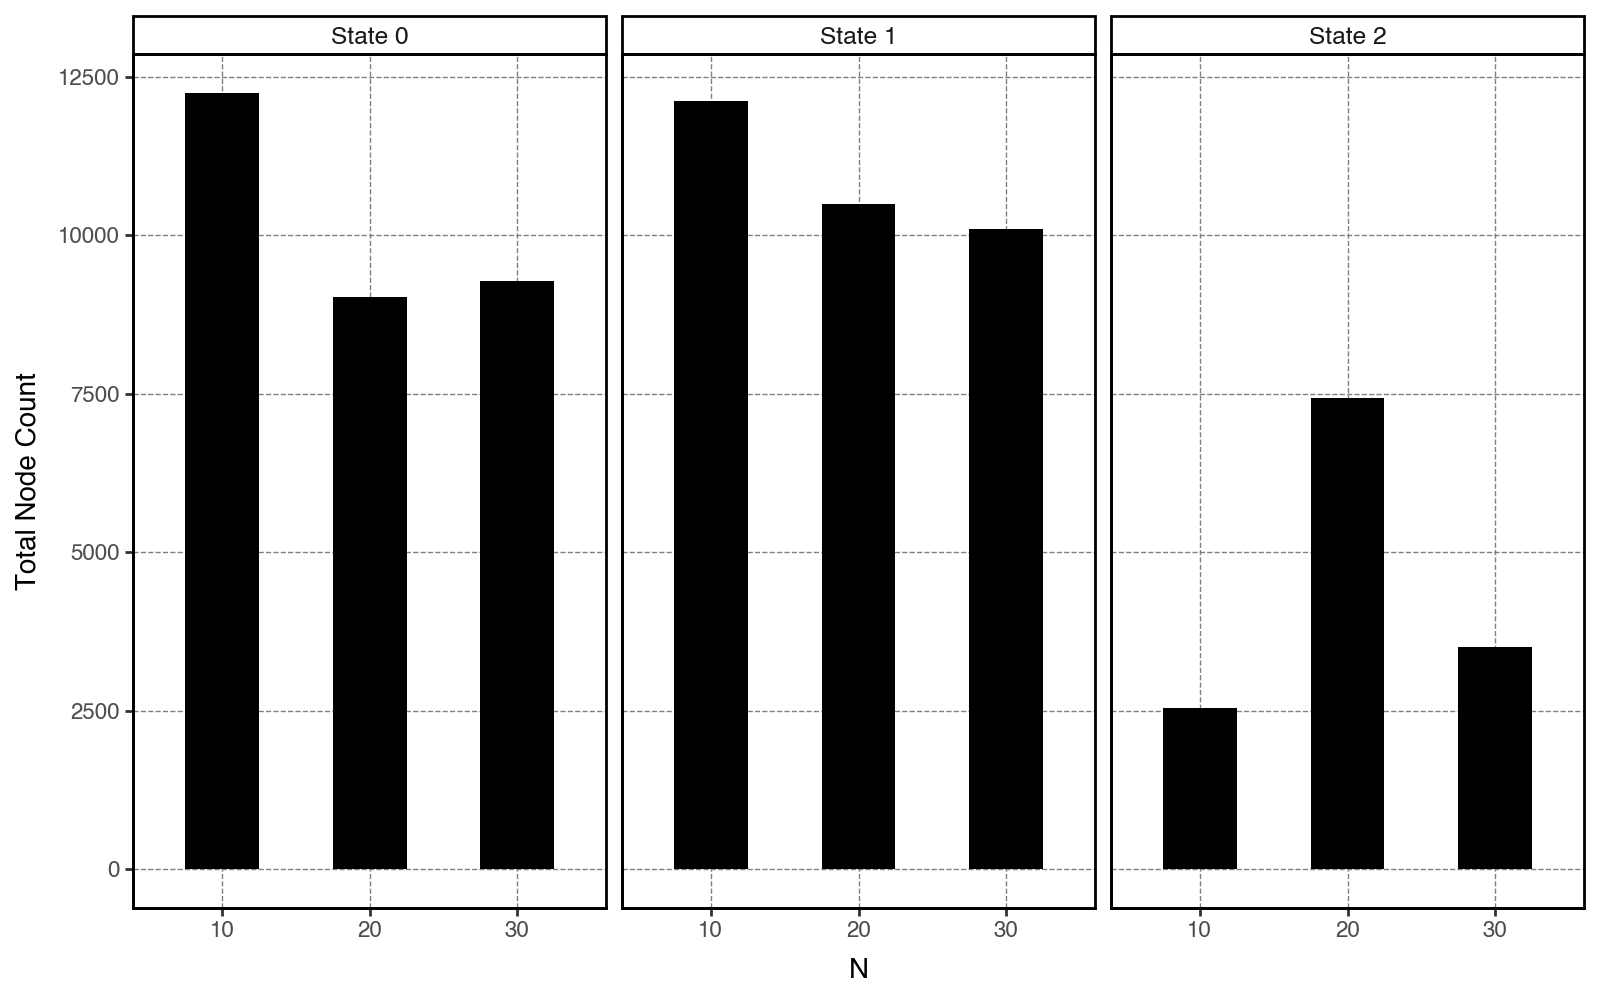

In [134]:
from tqdm import tqdm

datasets = {
    "10": narma10_200_models,
    "20": narma20_200_models,
    "30": narma30_200_models
}

state_counts = []

for label, df in datasets.items():
    total_state_0 = 0
    total_state_1 = 0
    total_state_2 = 0

    for i in tqdm(range(df.shape[0])):
        try:
            reservoir_encoded = df.loc[df['run_id'] == i, 'reservoir'].values[0]
            reservoir_decoded = jsonpickle.decode(reservoir_encoded)

            state_vector = np.array(reservoir_decoded.states_1d()) 

            total_state_0 += np.sum(state_vector == 0)
            total_state_1 += np.sum(state_vector == 1)
            total_state_2 += np.sum(state_vector == 2)

        except Exception as e:
            print(f"Error processing run_id {i} in dataset {label}: {e}")

    state_counts.append({"order": label, "state_0": total_state_0, "state_1": total_state_1, "state_2": total_state_2})

state_summary_df = pd.DataFrame(state_counts)

state_summary_long = state_summary_df.melt(id_vars=["order"], var_name="State", value_name="Total Node Count")

state_summary_long["State"] = state_summary_long["State"].replace({"state_0": "State 0", "state_1": "State 1", "state_2": "State 2"})

custom_colors = {"10": "black", "20": "black", "30": "black"}

g = (
    ggplot(state_summary_long, aes(x="order", y="Total Node Count", fill="order"))  # Fill by order
    + geom_bar(stat="identity", position="dodge", width=0.5)
    + facet_wrap("~State")  # Facet by state
    + scale_fill_manual(values=custom_colors)  # Apply custom colors
    + labs(x="N", y="Total Node Count")
    + theme_classic()
    + custom_theme
    + theme(legend_position="none")  # Remove legend
)

g.save("results/narman_state_distribution.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')

g

In [137]:
metrics_df = pd.read_parquet("metrics_corrected.parquet")

summary_stats = metrics_df.groupby("dataset").agg(
    median_KR=("KR", "median"),
    IQR_KR=("KR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    
    median_GM=("GM", "median"),
    IQR_GM=("GM", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    
    median_SR=("SR", "median"),
    IQR_SR=("SR", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    
    median_Density=("Density", "median"),
    IQR_Density=("Density", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    
    median_Degree=("Degree", "median"),
    IQR_Degree=("Degree", lambda x: x.quantile(0.75) - x.quantile(0.25)),
    
    median_Size=("Size", "median"),
    IQR_Size=("Size", lambda x: x.quantile(0.75) - x.quantile(0.25))
).reset_index()

summary_stats = summary_stats.round(3)

summary_stats

,dataset,median_KR,IQR_KR,median_GM,IQR_GM,median_SR,IQR_SR,median_Density,IQR_Density,median_Degree,IQR_Degree,median_Size,IQR_Size
0,io_200,0.045,0.042,1.000,0.013,0.000,1.000,0.048,0.015,2.909,3.000,22.0,147.00
1,narma10_100,0.983,0.030,0.996,0.010,0.000,1.000,0.015,0.010,2.625,1.017,100.0,1.00
2,narma10_200,0.954,0.204,0.999,0.014,1.000,1.000,0.010,0.009,3.256,2.513,194.0,21.25
3,narma20_200,0.990,0.035,0.998,0.010,1.000,1.000,0.007,0.005,2.650,0.990,199.0,8.75
4,narma30_200,0.995,0.020,0.998,0.012,1.000,1.000,0.008,0.005,2.633,0.980,198.0,58.25
5,santafe_200,0.396,0.442,1.081,0.403,5.365,4.884,0.028,0.023,10.188,8.499,189.0,13.00


In [185]:
datasets = {
    "narma10_100": narma10_100_fitness,
    "narma10_200": narma10_200_fitness,
    "narma10_300": narma10_300_fitness,
    "narma20_200": narma20_200_fitness,
    "narma30_200": narma30_200_fitness,
    "santafe_200": santafe_200_fitness,
    "io_200": io_200_fitness,
    "combined_200": combined_200_fitness
}

results = []

for name, df in datasets.items():
    df_epoch = df[df["epoch"] == 980]
    median_val = df_epoch["best_fitness"].median()
    iqr_val = df_epoch["best_fitness"].quantile(0.75) - df_epoch["best_fitness"].quantile(0.25)
    results.append({
        "dataset": name,
        "median_best_fitness": round(median_val, 3),
        "IQR_best_fitness": round(iqr_val, 3)
    })

summary_df = pd.DataFrame(results)

summary_df

,dataset,median_best_fitness,IQR_best_fitness
0,narma10_100,0.135,0.015
1,narma10_200,0.110,0.043
2,narma10_300,0.014,0.029
3,narma20_200,0.135,0.011
4,narma30_200,0.150,0.019
5,santafe_200,0.918,0.032
6,io_200,0.968,0.030
7,combined_200,8.300,29.585


/var/folders/bd/sb4c0kpn6c97z9hkd8vmh2gm0000gn/T/ipykernel_15019/2886775749.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_kr_boxplot.pdf


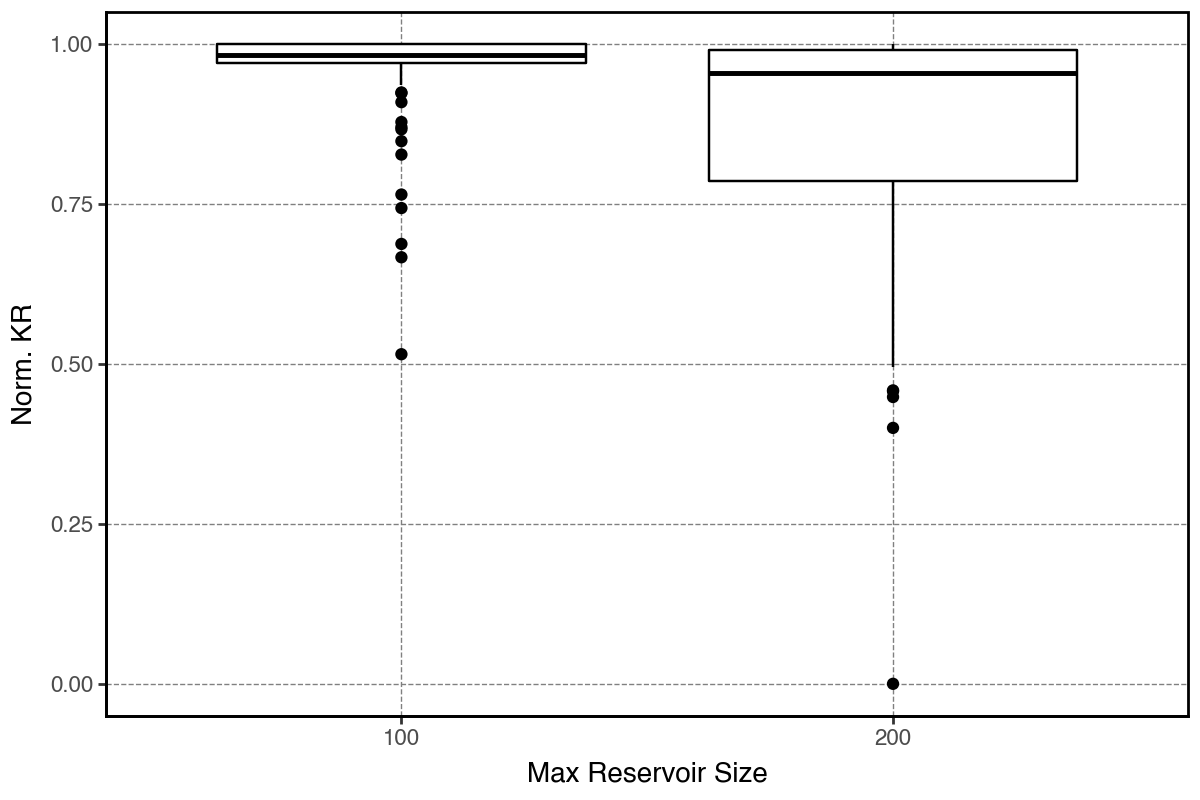

In [141]:
options.figure_size = (6, 4)

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
)

filtered_df = metrics_df[metrics_df["dataset"].isin(["narma10_100", "narma10_200"])]

filtered_df["dataset"] = filtered_df["dataset"].replace({"narma10_100": "100", "narma10_200": "200"})

g = (
    ggplot(filtered_df, aes(x="dataset", y="KR"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(x="Max Reservoir Size", y="Norm. KR")
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_kr_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')
g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 4 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_gm_boxplot.pdf
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.


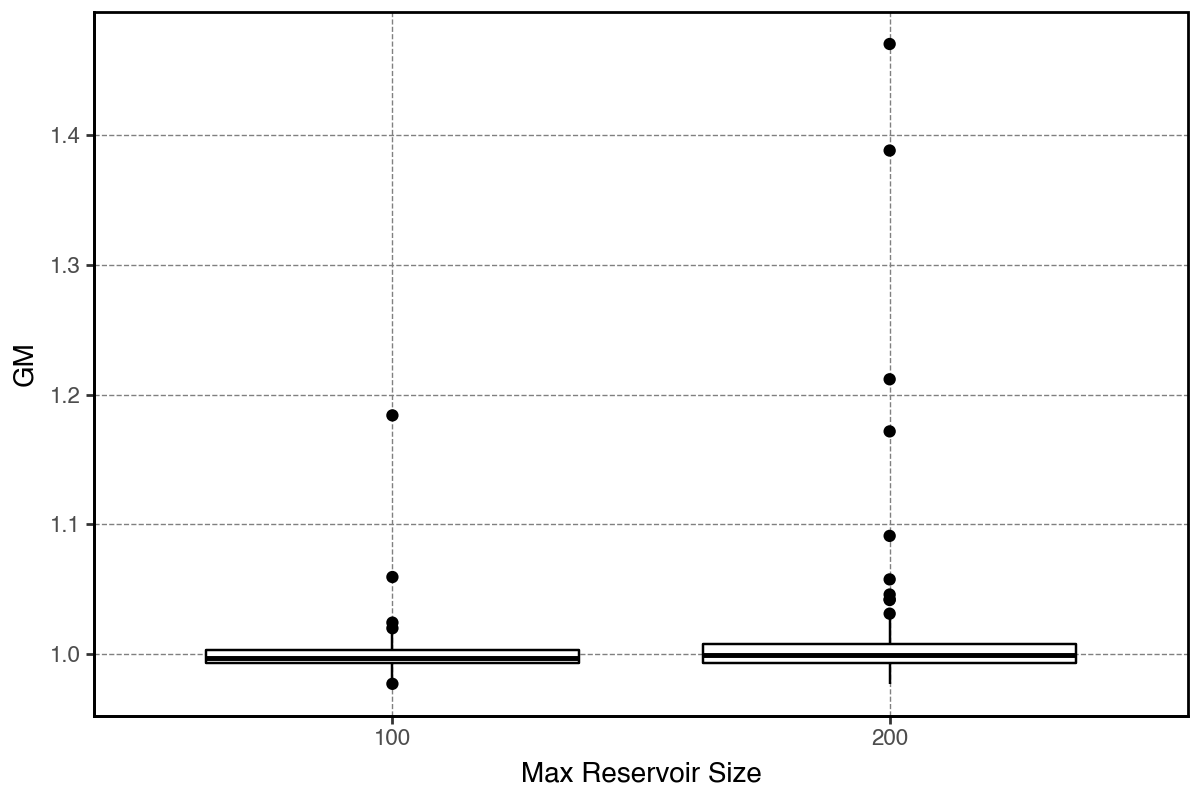

In [143]:
g = (
    ggplot(filtered_df, aes(x="dataset", y="GM"))
    + geom_boxplot(fill="white", color="black", outlier_color="black")
    + labs(x="Max Reservoir Size", y="GM")
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_gm_boxplot.pdf", width=6, height=4, dpi=1000, bbox_inches='tight')
g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_kr_vs_gm.pdf


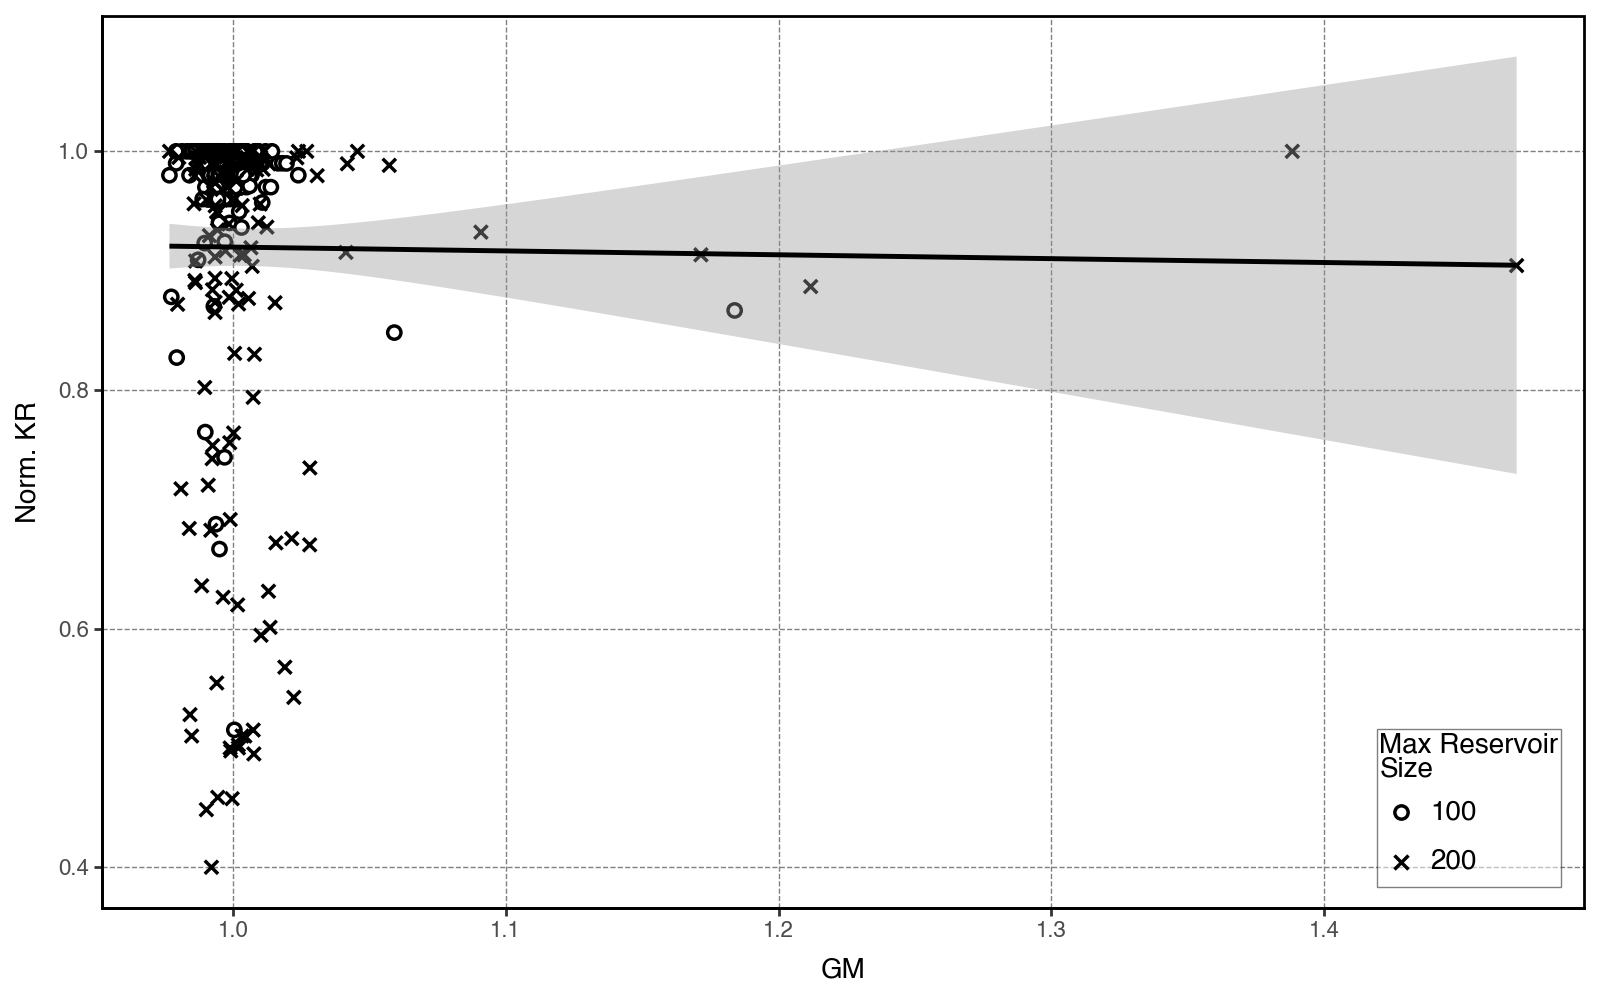

In [182]:
options.figure_size = (8, 5)

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    legend_position=(0.86, 0.2),  
    legend_justification=(0, 1)
)

shape_mapping = {"100": "o", "200": "x"}
valid_datasets = ["narma10_100", "narma10_200"]

filtered_df = metrics_df[metrics_df["dataset"].isin(valid_datasets)].copy()

filtered_df = filtered_df.dropna(subset=["GM", "KR"])

filtered_df = filtered_df[filtered_df["GM"] <= 1.5]

filtered_df["dataset"] = filtered_df["dataset"].replace({"narma10_100": "100", "narma10_200": "200"})

filtered_df["Max Reservoir\nSize"] = filtered_df["dataset"]

g = (
    ggplot(filtered_df, aes(x="GM", y="KR"))
    + geom_point(aes(shape="Max Reservoir\nSize"), size=2, stroke=0.7, fill="white", color="black", alpha=1)
    + scale_shape_manual(values=shape_mapping)
    + geom_smooth(aes(group=1), method="lm", se=True, color="black", linetype="solid")
    + labs(
        x="GM",
        y="Norm. KR"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_kr_vs_gm.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')
g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_gm_vs_fit.pdf


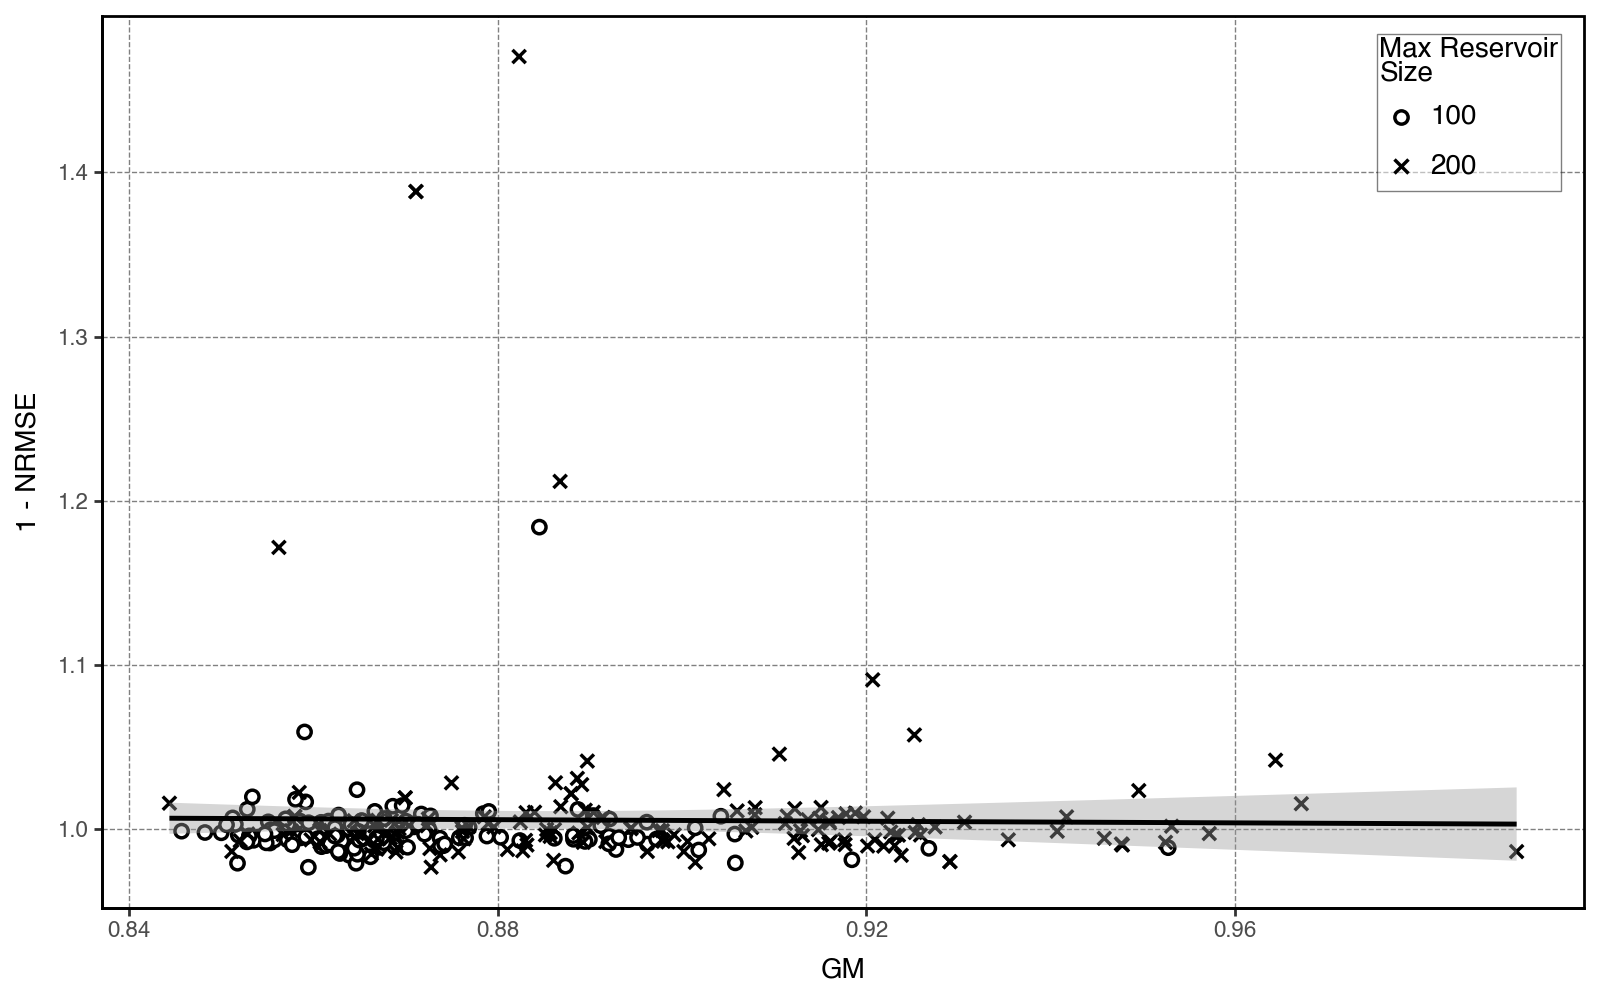

In [ ]:
merged_filtered_df = pd.merge(merged_df, filtered_df, on=["Max Reservoir\nSize", "run_id"], how="inner")

custom_theme = theme(
    plot_title=element_text(size=14, weight="bold"),  
    axis_title_x=element_text(size=10),  
    axis_title_y=element_text(size=10),  
    axis_text_x=element_text(size=8),  
    axis_text_y=element_text(size=8),  
    panel_border=element_rect(fill=None, color="black"),
    panel_grid_major=element_line(color="grey", size=0.5, linetype="--"),  # Add major grid
    
    legend_title=element_text(size=10, weight="bold"),  
    legend_text=element_text(size=10),  
    legend_background=element_rect(fill="white", color="black", alpha=0.5, size=0.5),
    legend_position=(0.86, 0.98),  
    legend_justification=(0, 1)
)

g = (
    ggplot(merged_filtered_df, aes(x="inverse_fitness", y="GM"))
    + geom_point(aes(shape="Max Reservoir\nSize"), size=2, stroke=0.7, fill="white", color="black", alpha=1)
    + scale_shape_manual(values=shape_mapping)
    + geom_smooth(aes(group=1), method="lm", se=True, color="black", linetype="solid")
    + labs(
        y="GM",
        x="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_gm_vs_fit.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')
g

/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 8 x 5 in image.
/opt/homebrew/Caskroom/miniconda/base/envs/dgca_tasks/lib/python3.10/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: results/narma10_kr_vs_fit.pdf


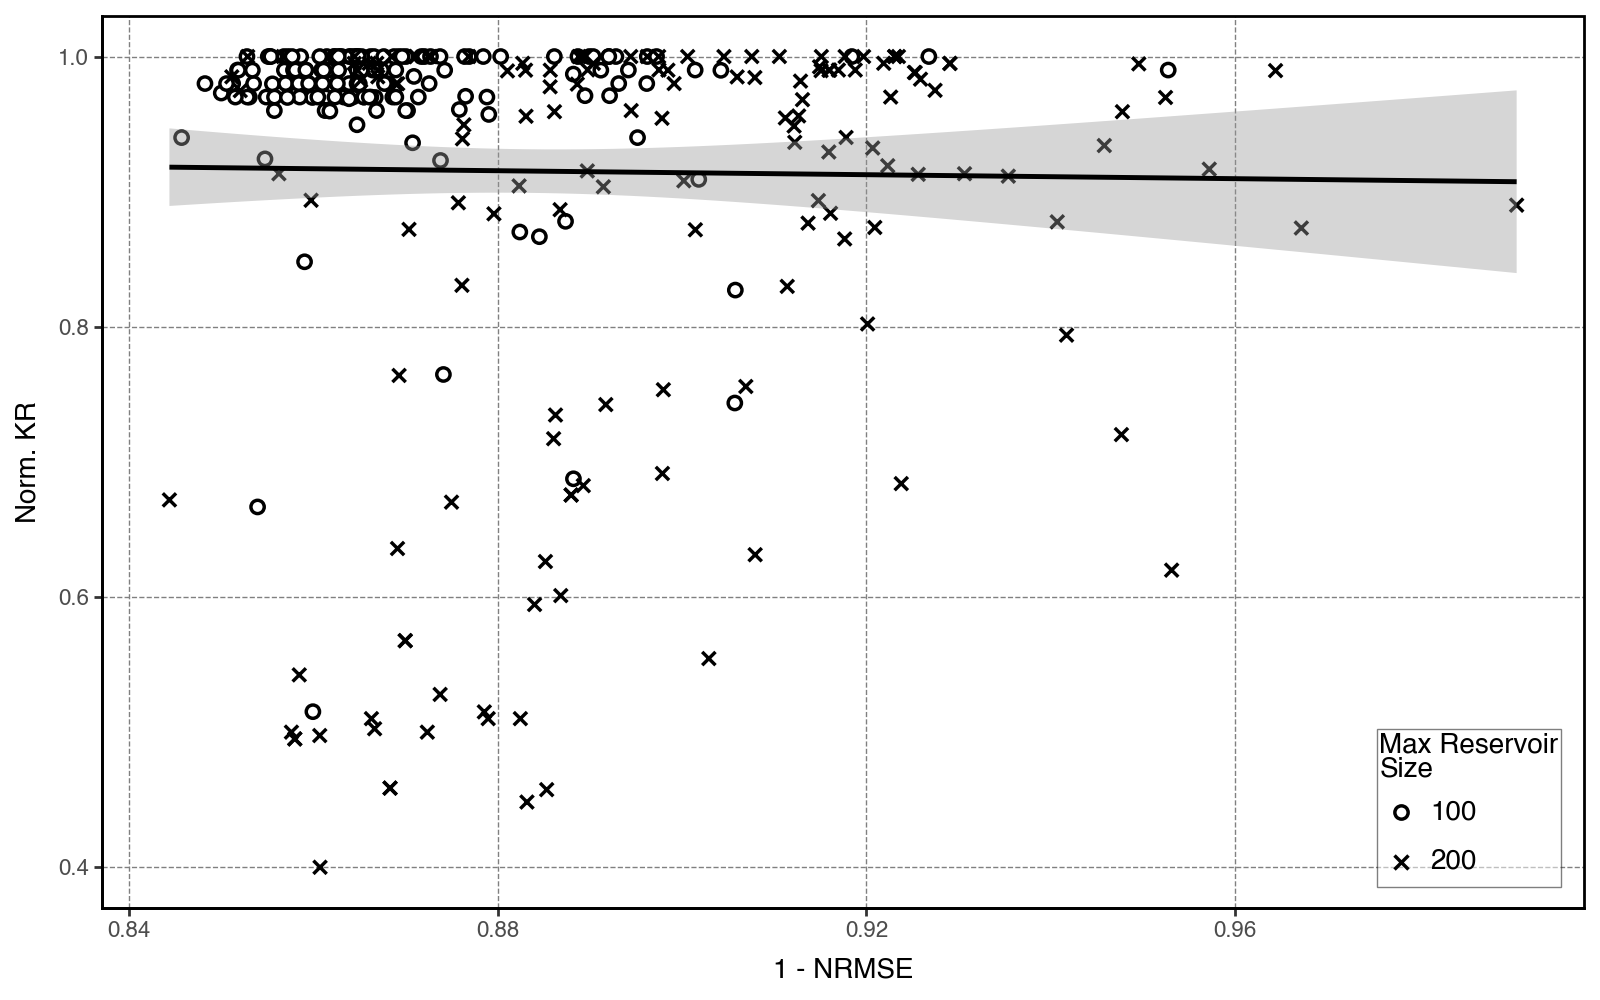

In [183]:
g = (
    ggplot(merged_filtered_df, aes(x="inverse_fitness", y="KR"))
    + geom_point(aes(shape="Max Reservoir\nSize"), size=2, stroke=0.7, fill="white", color="black", alpha=1)
    + scale_shape_manual(values=shape_mapping)
    + geom_smooth(aes(group=1), method="lm", se=True, color="black", linetype="solid")
    + labs(
        y="Norm. KR",
        x="1 - NRMSE"
    )
    + theme_classic()
    + custom_theme
)

g.save("results/narma10_kr_vs_fit.pdf", width=8, height=5, dpi=1000, bbox_inches='tight')
g

In [2]:
best_run_narma10_100 = narma10_100_fitness[narma10_100_fitness["epoch"] == 980] \
    .sort_values("best_fitness").iloc[0]["run_id"]

best_run_narma10_200 = narma10_200_fitness[narma10_200_fitness["epoch"] == 980] \
    .sort_values("best_fitness").iloc[0]["run_id"]

print("Best run_id for narma10_100:", best_run_narma10_100)
print("Best run_id for narma10_200:", best_run_narma10_200)

Best run_id for narma10_100: 13.0
Best run_id for narma10_200: 119.0


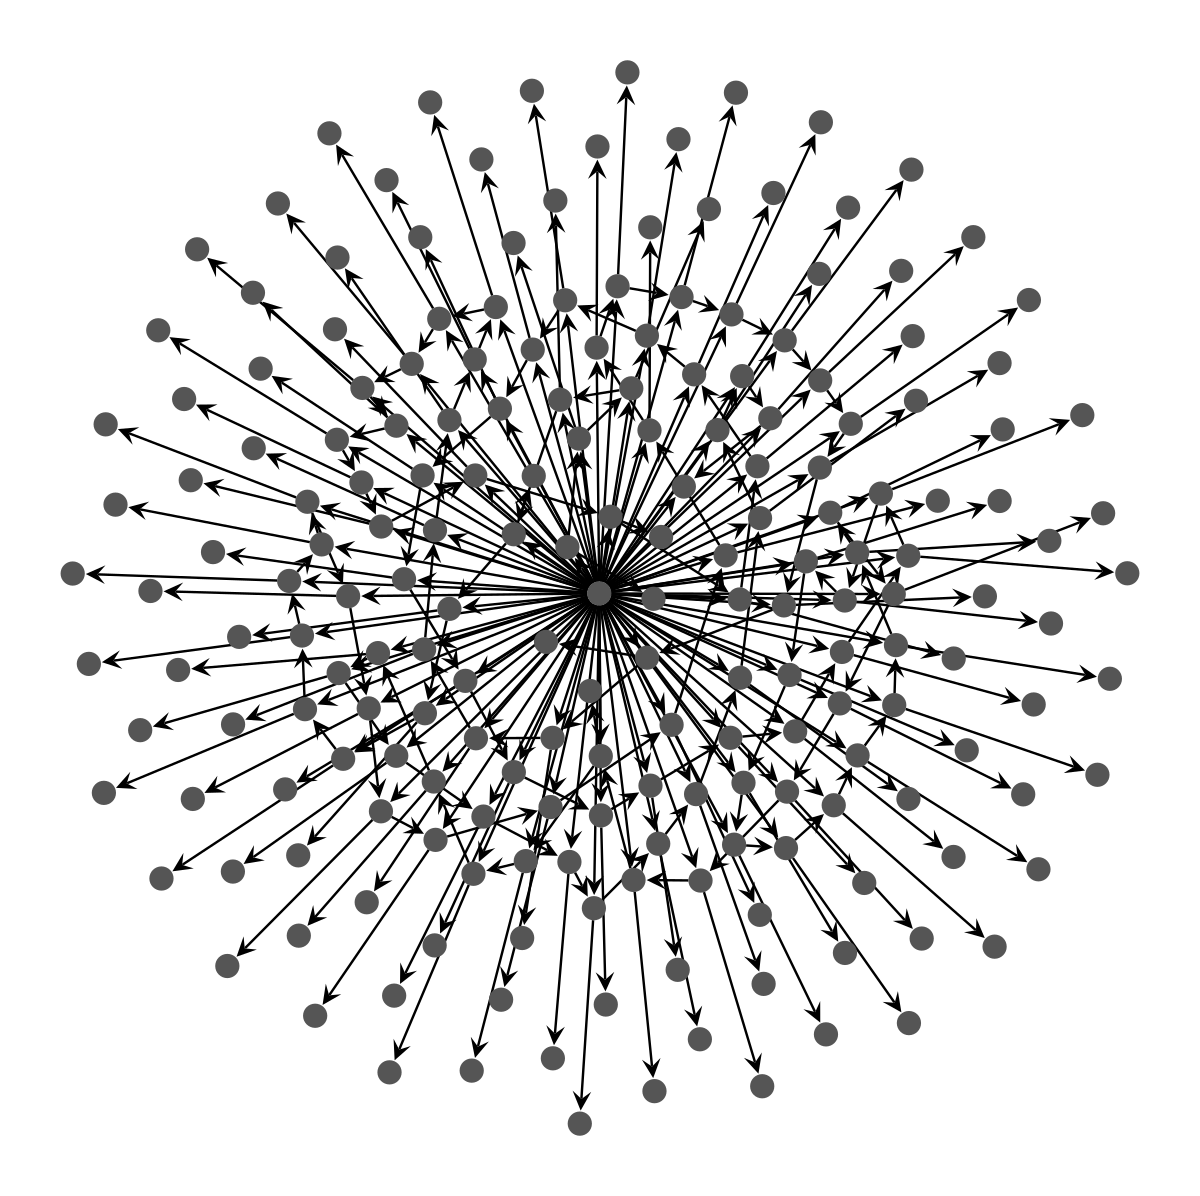

: 

In [ ]:
run_id = 119

reservoir_encoded = narma10_200_models.loc[(narma10_200_models["run_id"] == run_id) & (narma10_200_models["epoch"] == -1), "reservoir"].values[0]
reservoir_decoded = jsonpickle.decode(reservoir_encoded)

reservoir_decoded.bipolar().draw_gt()
reservoir_decoded.bipolar().draw_gt(output="results/narma10_200_best.pdf")

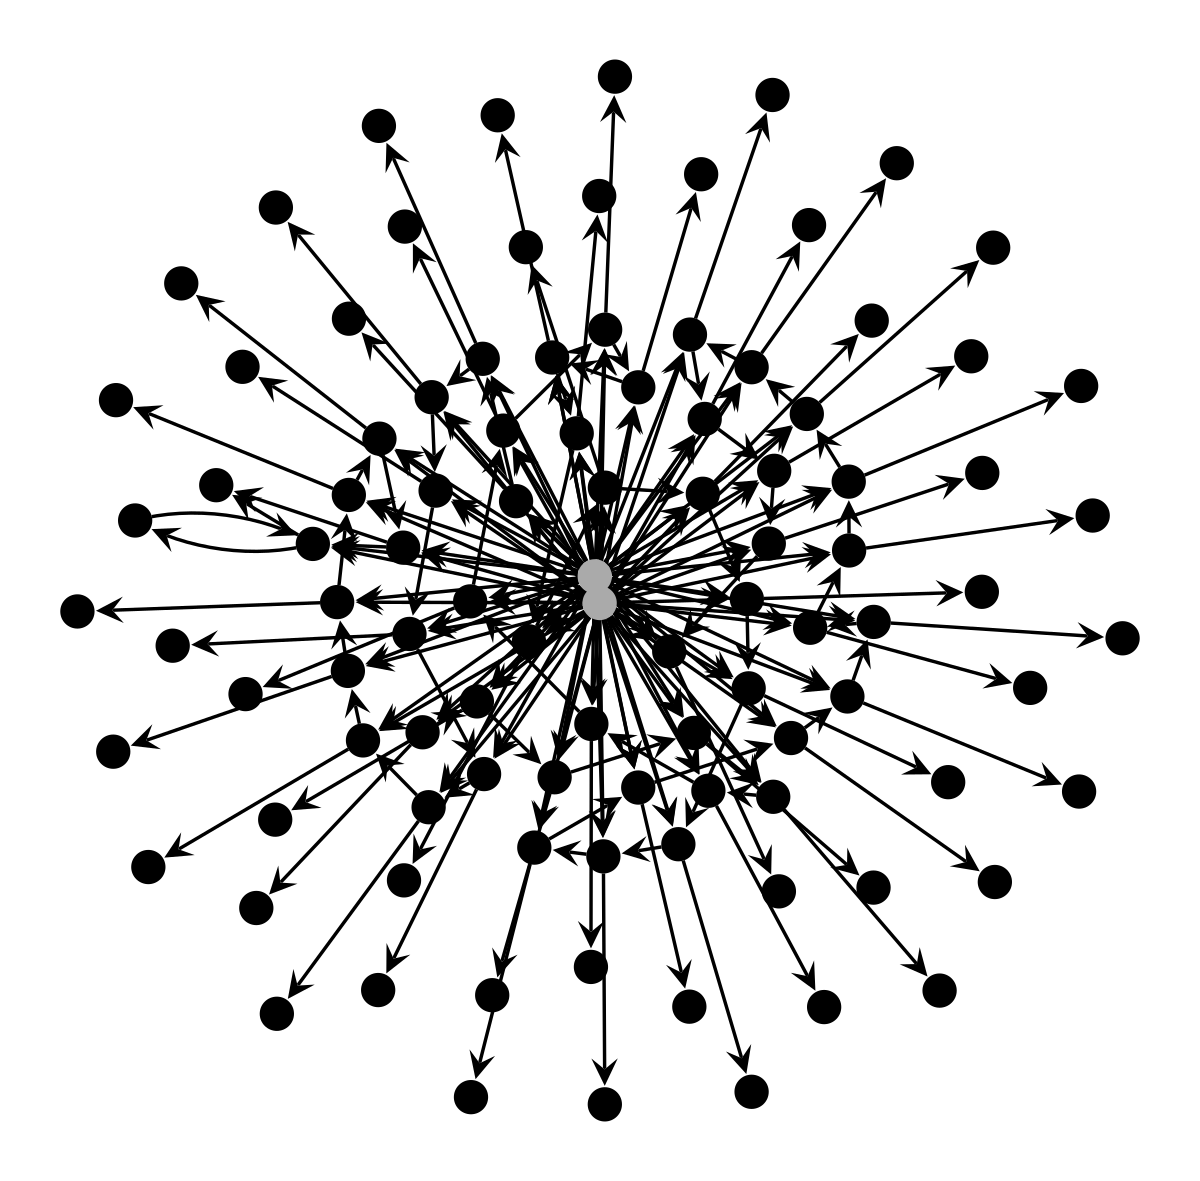

In [5]:
run_id = 13

reservoir_encoded = narma10_100_models.loc[(narma10_100_models["run_id"] == run_id) & (narma10_100_models["epoch"] == -1), "reservoir"].values[0]
reservoir_decoded = jsonpickle.decode(reservoir_encoded)

reservoir_decoded.bipolar().draw_gt()
reservoir_decoded.bipolar().draw_gt(output="results/narma10_100_best.pdf")